In [22]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

fight_data_file = '../combined_data/combined_fight_data.csv'

def import_and_merge():
    fight_data = pd.read_csv(fight_data_file)
    
    #Add Blue and Red win columns
    fight_data['B_Winner'] = [1 if x=='Blue' else 0 for x in fight_data['Winner']]
    fight_data['R_Winner'] = [1 if x=='Red' else 0 for x in fight_data['Winner']]
    
    #Drop columns irrelevant to this prediction
    fight_data = fight_data.drop(columns=['Referee', 'no_of_rounds', 'Winner', 'date', 'end_method', 'end_how', 
                                          'end_round', 'attendance'])
    print('Fight Data Stats: ')
    print('Shape: ', fight_data.shape)
    #display(fight_data)
    
    #Separate fight data into individual fighter stats
    blue_fighters = fight_data.loc[:, [col for col in fight_data.columns if re.search('^R_', col)==None]]
    blue_fighters = blue_fighters.rename(columns=lambda x: re.sub('^B_', '', x))
    print('\nBlue fighter Stats: ')
    print('Shape: ', blue_fighters.shape)
    #display(blue_fighters)
    
    red_fighters = fight_data.loc[:, [col for col in fight_data.columns if re.search('^B_', col)==None]]
    red_fighters = red_fighters.rename(columns=lambda x: re.sub('^R_', '', x))
    print('\nRed fighter Stats: ')
    print('Shape: ', red_fighters.shape)
    #display(red_fighters)
    
    #Concatenate blue and red fighter stats
    fighters_data = pd.concat([blue_fighters, red_fighters])
    fighters_data = fighters_data.rename(columns={'total_time_fought(seconds)':'total_time_fought_seconds'})
    print('\nTotal fighter Stats: ')
    print('Shape: ', fighters_data.shape)
    
    # Create df without offence stats
    fighters_no_offence_stats = fighters_data.drop(columns=[col for col in fighters_data.columns if re.search('^avg_', col) != None])
    fighters_no_offence_stats = fighters_no_offence_stats.drop(columns='total_time_fought_seconds')
    print('\nFighters no offensive stats: ')
    print('Shape: ', fighters_no_offence_stats.shape)
    
    return (fighters_no_offence_stats, fighters_data)
    
data_no_offence_stats, data  = import_and_merge()

Fight Data Stats: 
Shape:  (5062, 147)

Blue fighter Stats: 
Shape:  (5062, 76)

Red fighter Stats: 
Shape:  (5062, 76)

Total fighter Stats: 
Shape:  (10124, 76)

Fighters no offensive stats: 
Shape:  (10124, 27)


Shape:  (10124, 76)


Index(['avg_opp_HEAD_att', 'avg_SIG_STR_att', 'avg_HEAD_att',
       'avg_opp_DISTANCE_landed', 'Stance_Southpaw', 'avg_opp_BODY_landed',
       'win_by_Decision_Split', 'avg_TOTAL_STR_landed', 'avg_opp_CLINCH_att',
       'avg_opp_TD_landed', 'avg_opp_CLINCH_landed', 'total_title_bouts',
       'avg_opp_TOTAL_STR_att', 'wins', 'Reach_cms', 'avg_SIG_STR_landed',
       'avg_opp_PASS', 'win_by_Decision_Unanimous', 'avg_SIG_STR_pct',
       'avg_HEAD_landed', 'avg_TD_pct', 'avg_opp_SIG_STR_landed',
       'avg_opp_TOTAL_STR_landed', 'avg_TD_att', 'avg_opp_KD',
       'avg_opp_GROUND_att', 'avg_PASS', 'avg_opp_HEAD_landed',
       'current_win_streak', 'longest_win_streak', 'avg_opp_TD_pct',
       'avg_GROUND_landed', 'avg_GROUND_att', 'avg_opp_GROUND_landed',
       'avg_TD_landed', 'avg_opp_SIG_STR_pct', 'age'],
      dtype='object')

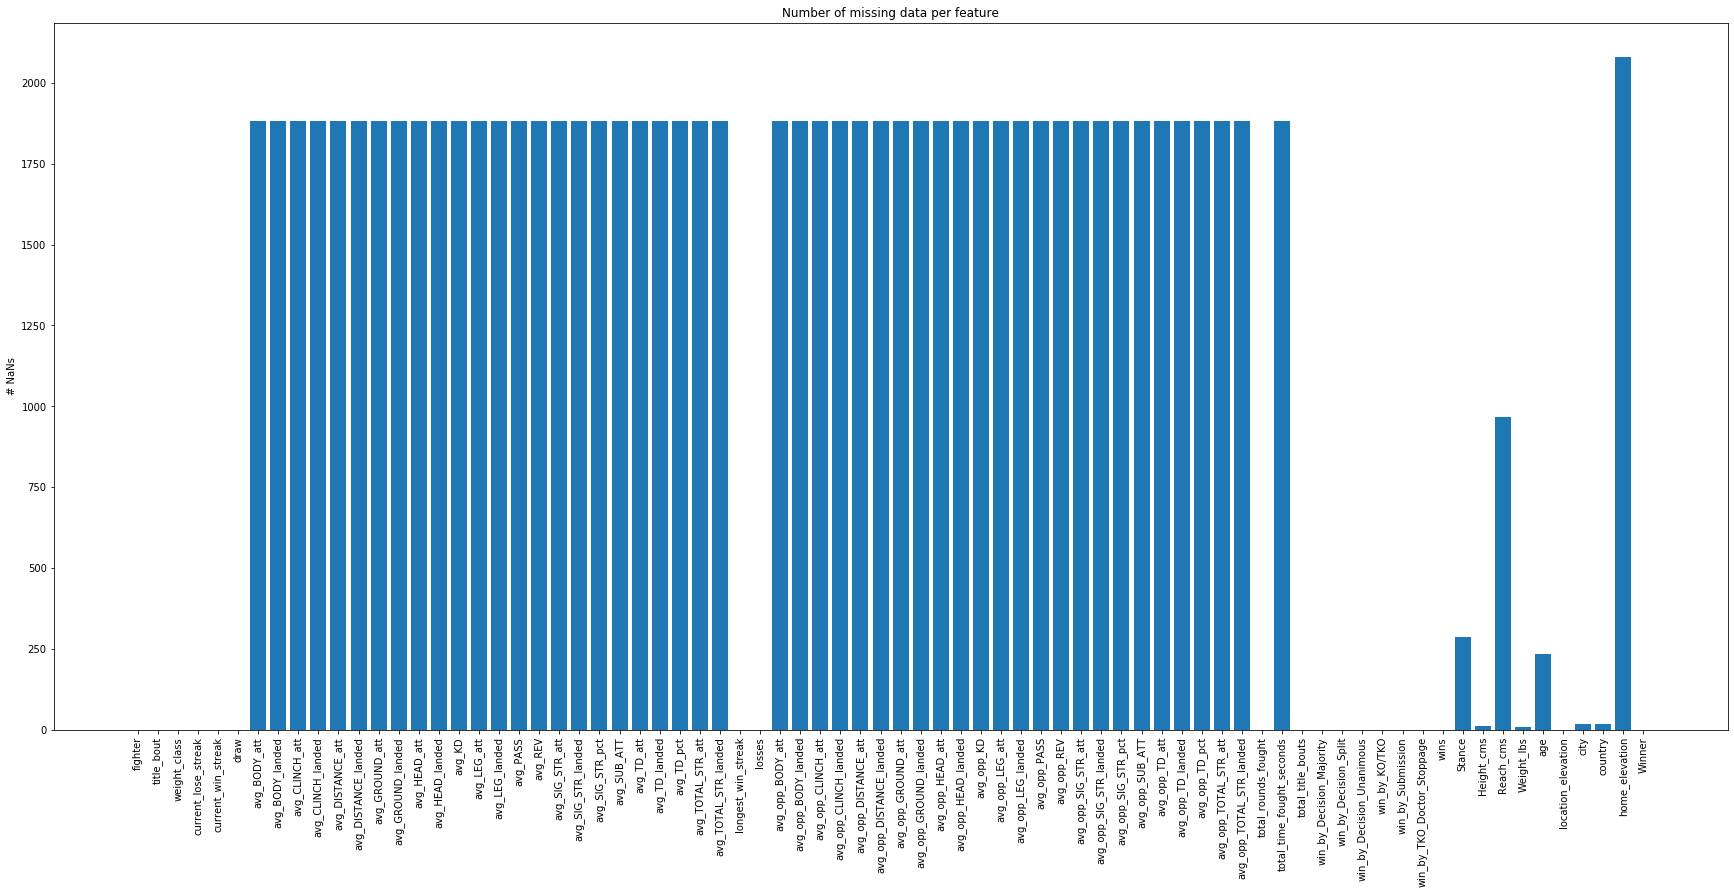

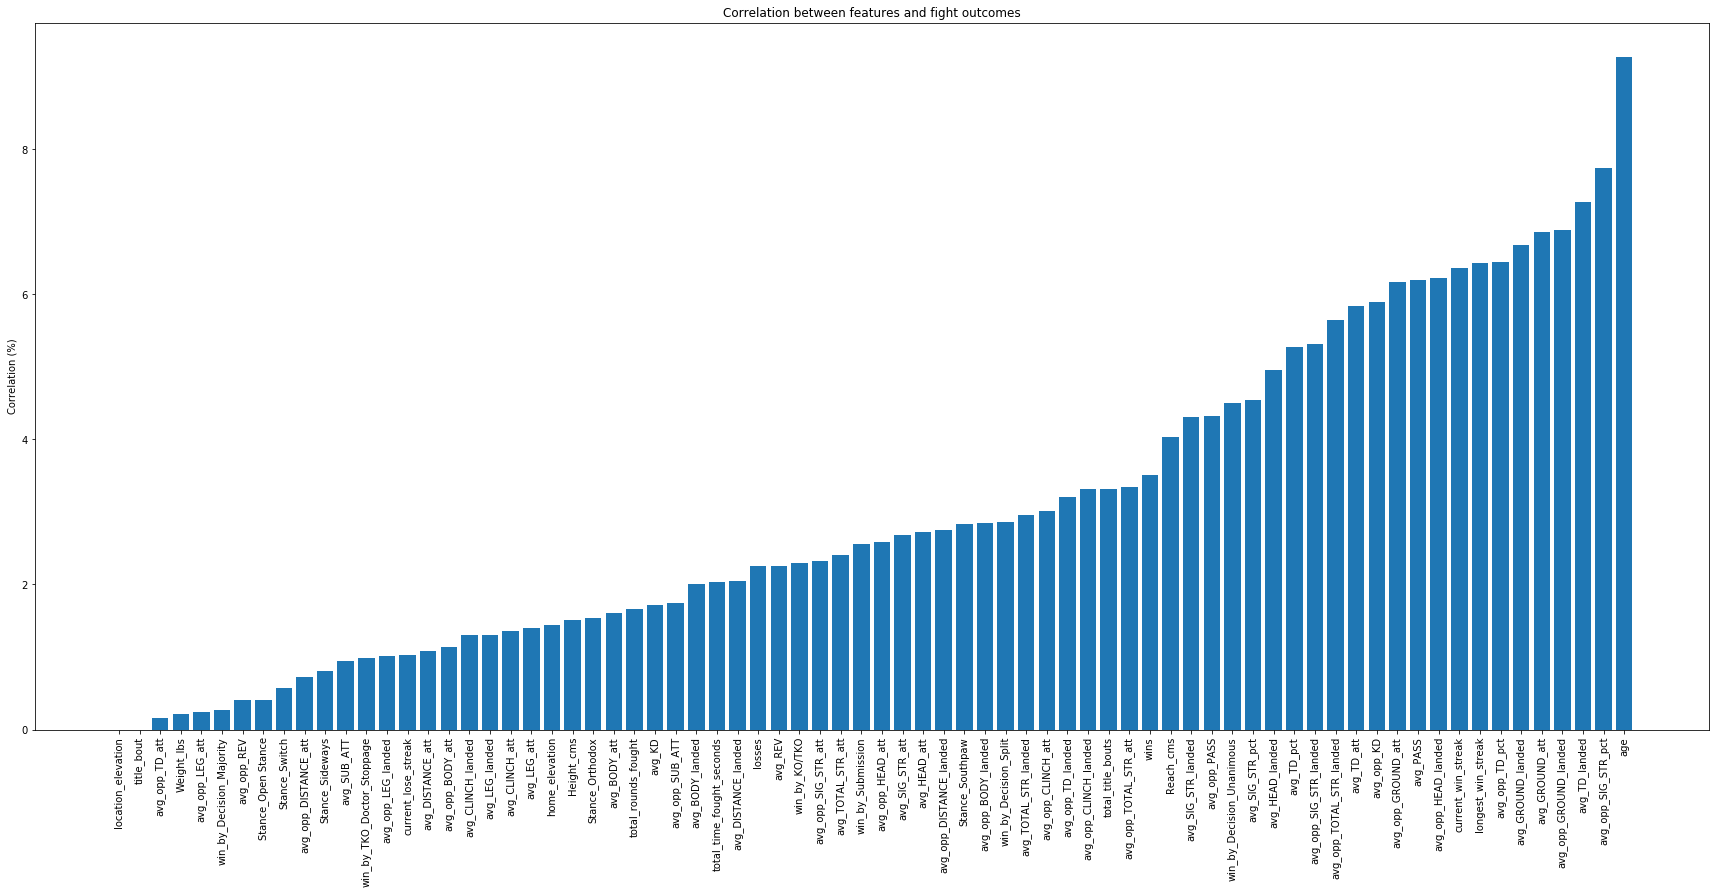

In [23]:
def plot_correlation(df):
    df = df.drop(columns=['fighter','city', 'country', 'weight_class'])
    dummy_df = pd.get_dummies(df)

    corr = dummy_df.corr()['Winner'][:]
    corr = corr.drop(['Winner']) * 100
    corr = corr.loc[~pd.isnull(corr)]
    corr = abs(corr).sort_values()
    
    fig = plt.figure(figsize=(30, 13))
    ax = plt.axes()
    ax.bar(corr.index, corr)
    plt.xticks(rotation='vertical')
    plt.ylabel('Correlation (%)')
    plt.title('Correlation between features and fight outcomes')
    
    most_corr_features = corr.index[-int(len(corr)/2):]
    return most_corr_features

def plot_missing_vals(df):
    columns = []
    nans_per_col = []
    
    for col in df.columns:
        num_nans = sum(pd.isnull(df[col]))
        #print('Num of NaNs in col ', col, ': ', num_nans)
        columns.append(col)
        nans_per_col.append(num_nans)
    
    print('Shape: ', df.shape)
    fig = plt.figure(figsize=(30, 13))
    ax = plt.axes()
    ax.bar(columns, nans_per_col)
    plt.xticks(rotation='vertical')
    plt.ylabel('# NaNs')
    plt.title('Number of missing data per feature')

plot_missing_vals(data)
plot_correlation(data)

<Figure size 2160x936 with 0 Axes>

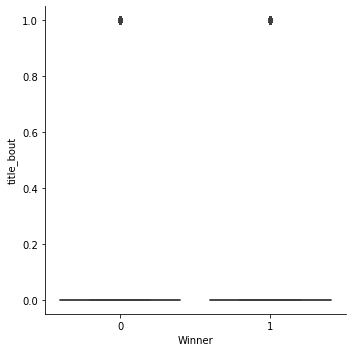

<Figure size 2160x936 with 0 Axes>

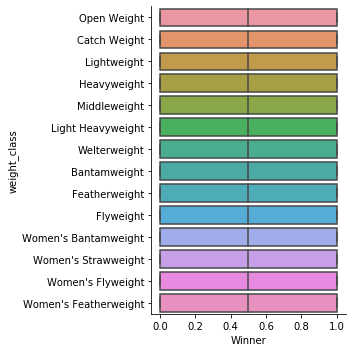

<Figure size 2160x936 with 0 Axes>

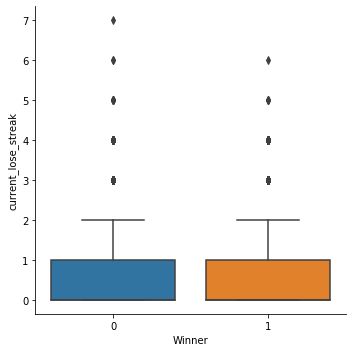

<Figure size 2160x936 with 0 Axes>

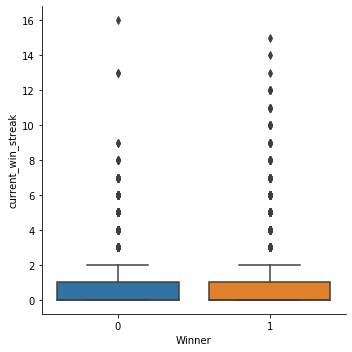

<Figure size 2160x936 with 0 Axes>

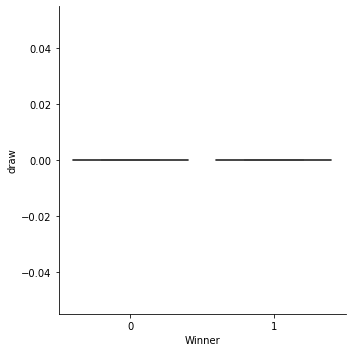

<Figure size 2160x936 with 0 Axes>

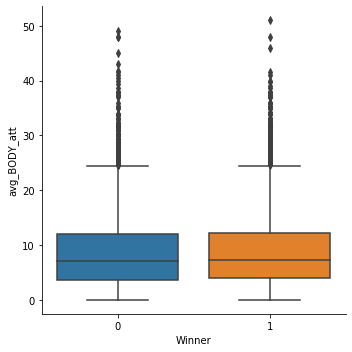

<Figure size 2160x936 with 0 Axes>

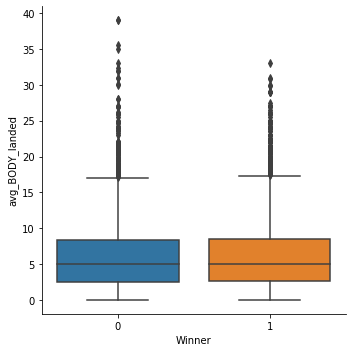

<Figure size 2160x936 with 0 Axes>

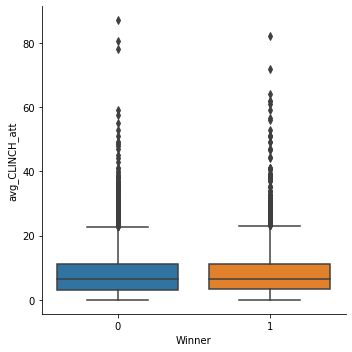

<Figure size 2160x936 with 0 Axes>

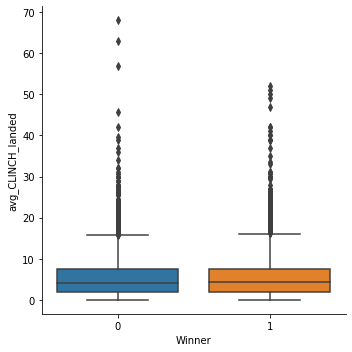

<Figure size 2160x936 with 0 Axes>

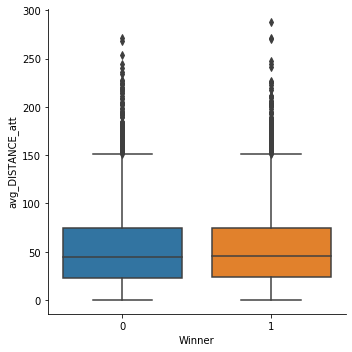

<Figure size 2160x936 with 0 Axes>

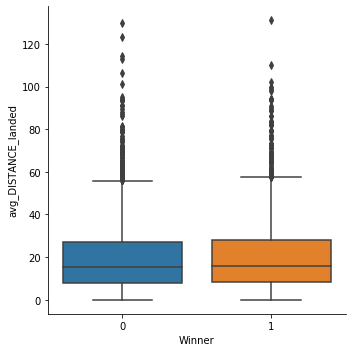

<Figure size 2160x936 with 0 Axes>

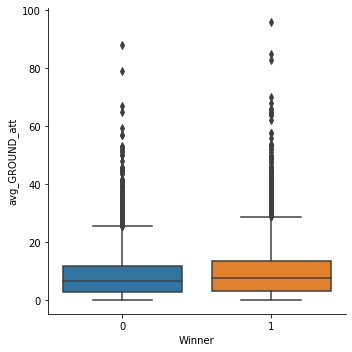

<Figure size 2160x936 with 0 Axes>

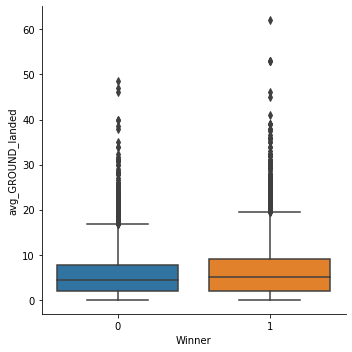

<Figure size 2160x936 with 0 Axes>

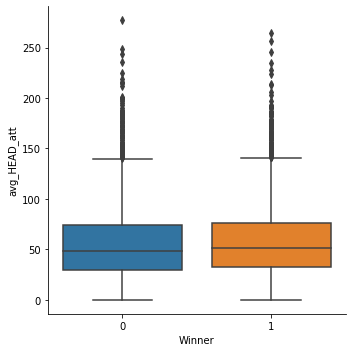

<Figure size 2160x936 with 0 Axes>

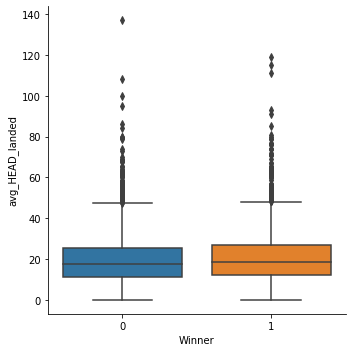

<Figure size 2160x936 with 0 Axes>

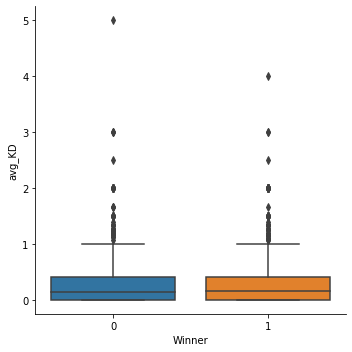

<Figure size 2160x936 with 0 Axes>

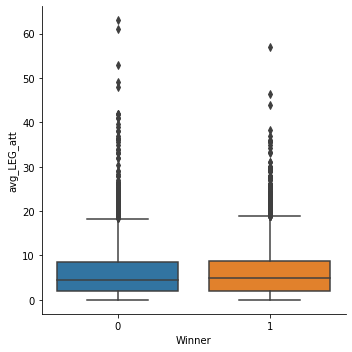

<Figure size 2160x936 with 0 Axes>

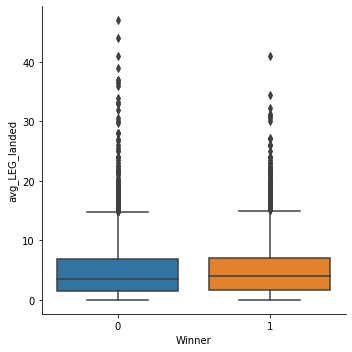

<Figure size 2160x936 with 0 Axes>

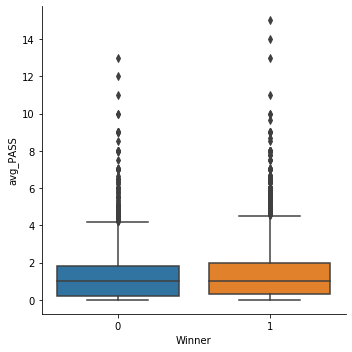

<Figure size 2160x936 with 0 Axes>

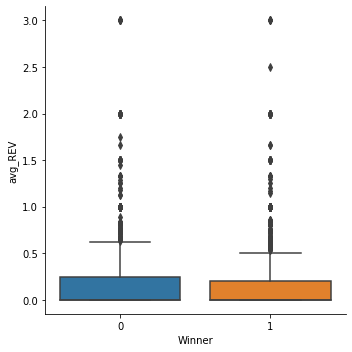

<Figure size 2160x936 with 0 Axes>

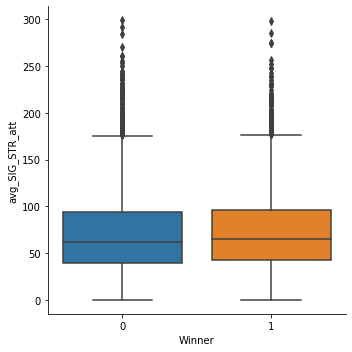

<Figure size 2160x936 with 0 Axes>

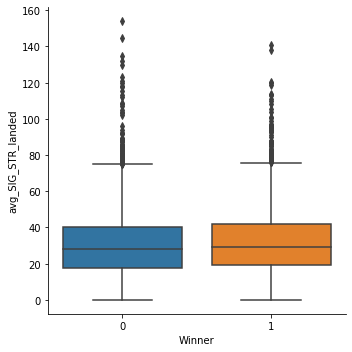

<Figure size 2160x936 with 0 Axes>

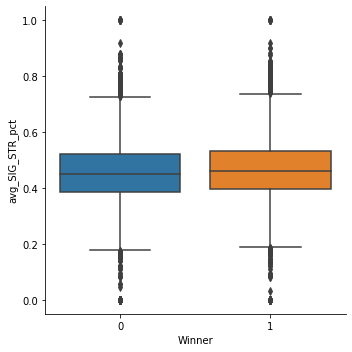

<Figure size 2160x936 with 0 Axes>

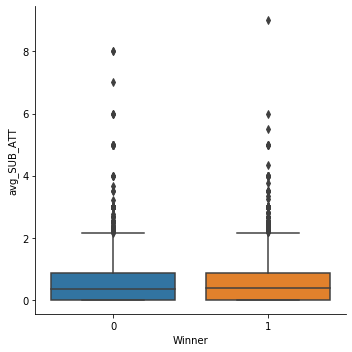

<Figure size 2160x936 with 0 Axes>

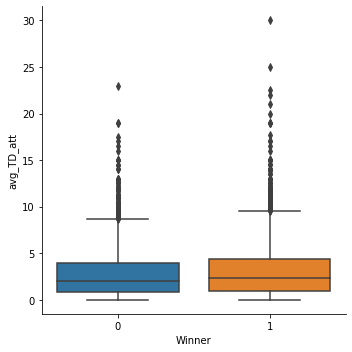

<Figure size 2160x936 with 0 Axes>

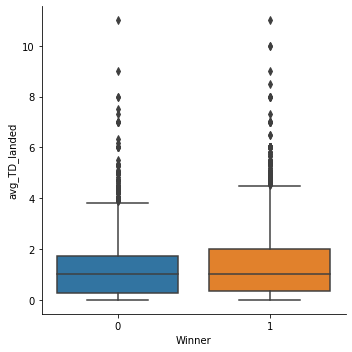

<Figure size 2160x936 with 0 Axes>

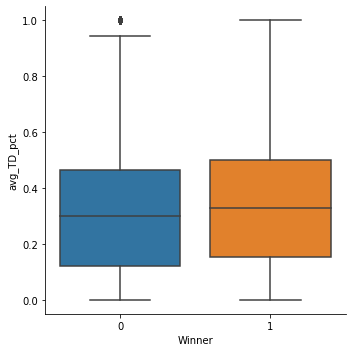

<Figure size 2160x936 with 0 Axes>

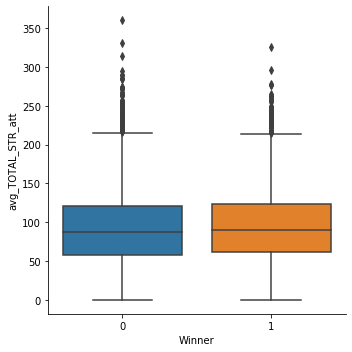

<Figure size 2160x936 with 0 Axes>

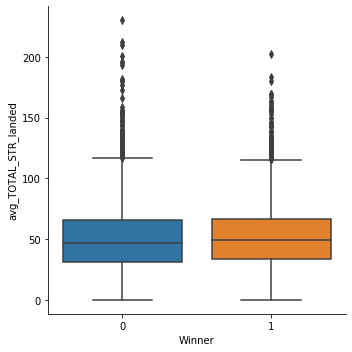

<Figure size 2160x936 with 0 Axes>

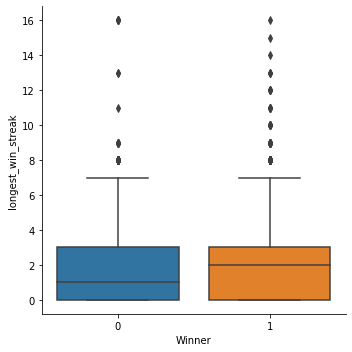

<Figure size 2160x936 with 0 Axes>

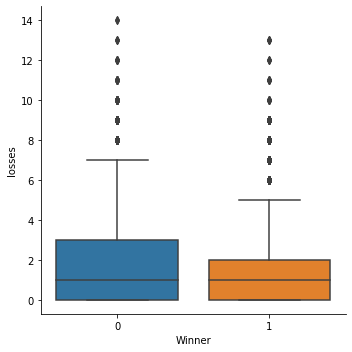

<Figure size 2160x936 with 0 Axes>

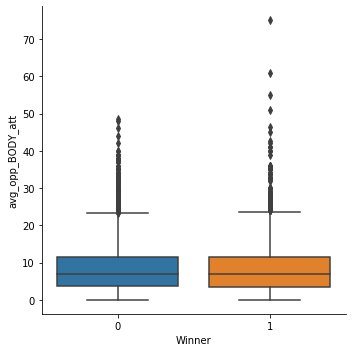

<Figure size 2160x936 with 0 Axes>

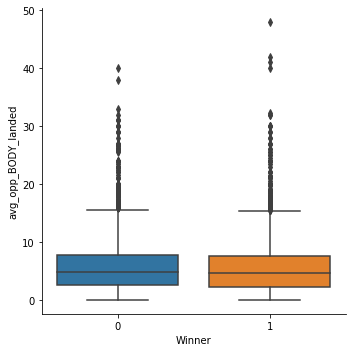

<Figure size 2160x936 with 0 Axes>

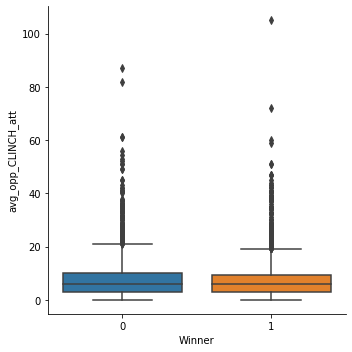

<Figure size 2160x936 with 0 Axes>

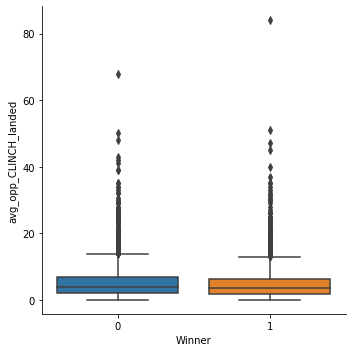

<Figure size 2160x936 with 0 Axes>

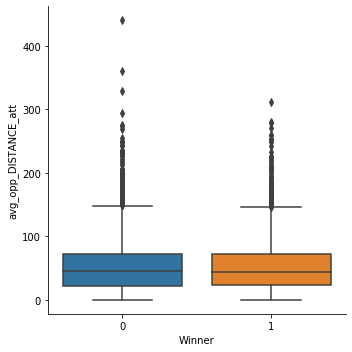

<Figure size 2160x936 with 0 Axes>

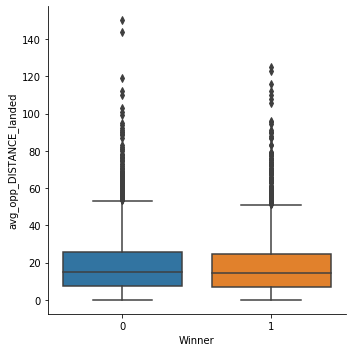

<Figure size 2160x936 with 0 Axes>

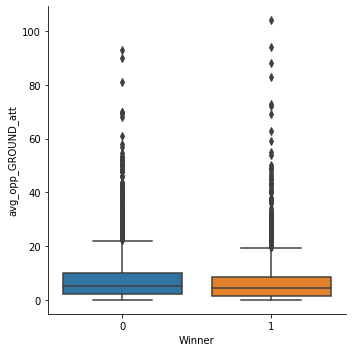

<Figure size 2160x936 with 0 Axes>

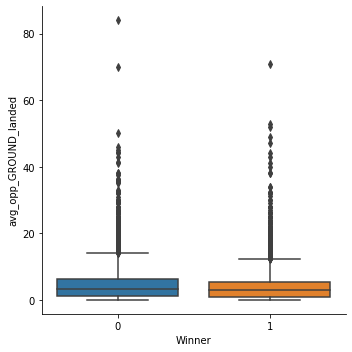

<Figure size 2160x936 with 0 Axes>

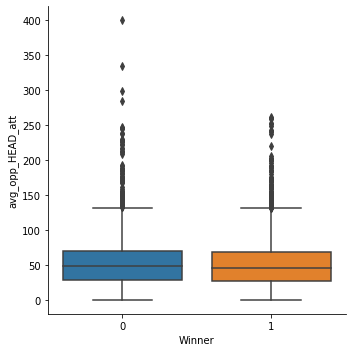

<Figure size 2160x936 with 0 Axes>

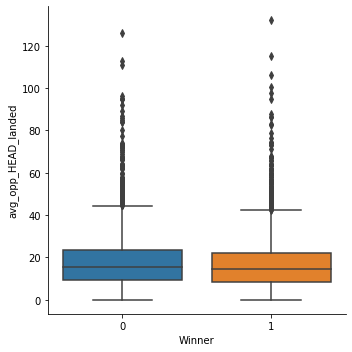

<Figure size 2160x936 with 0 Axes>

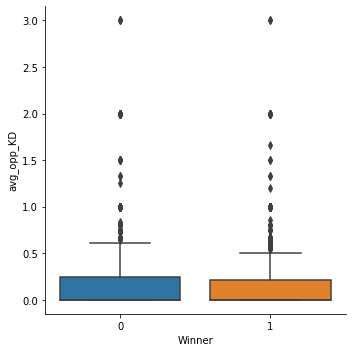

<Figure size 2160x936 with 0 Axes>

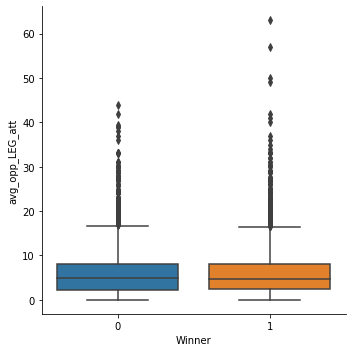

<Figure size 2160x936 with 0 Axes>

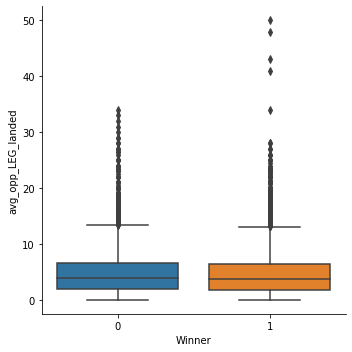

<Figure size 2160x936 with 0 Axes>

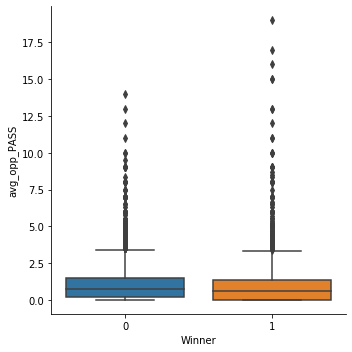

<Figure size 2160x936 with 0 Axes>

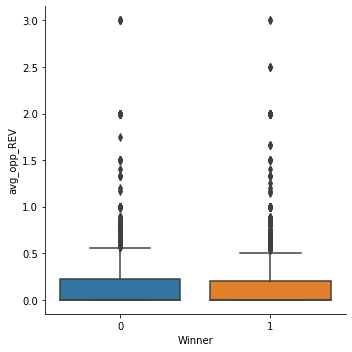

<Figure size 2160x936 with 0 Axes>

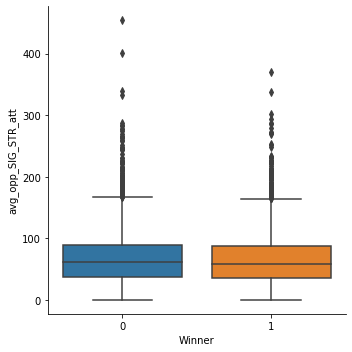

<Figure size 2160x936 with 0 Axes>

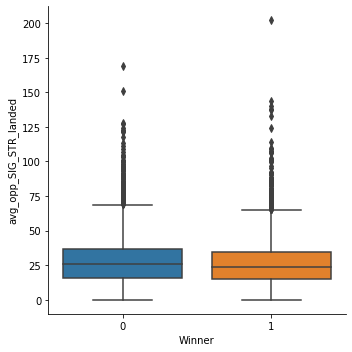

<Figure size 2160x936 with 0 Axes>

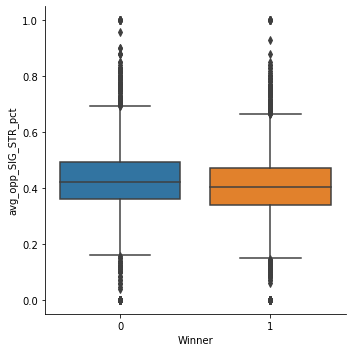

<Figure size 2160x936 with 0 Axes>

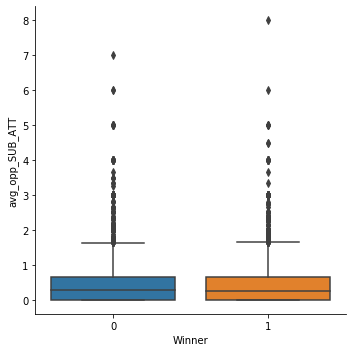

<Figure size 2160x936 with 0 Axes>

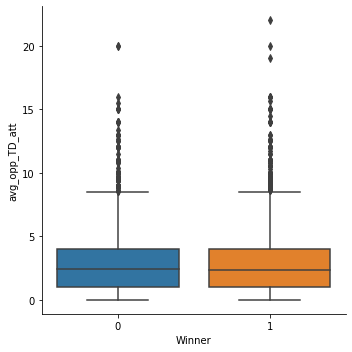

<Figure size 2160x936 with 0 Axes>

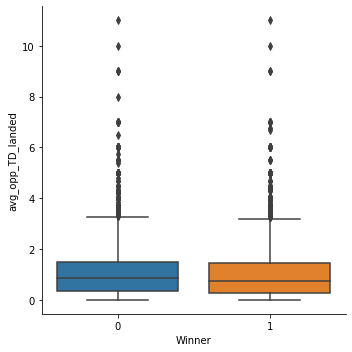

<Figure size 2160x936 with 0 Axes>

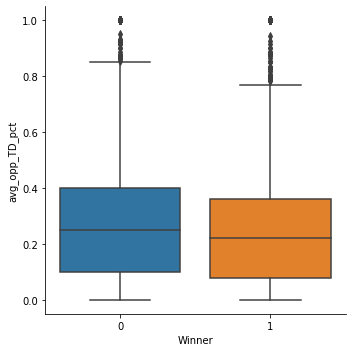

<Figure size 2160x936 with 0 Axes>

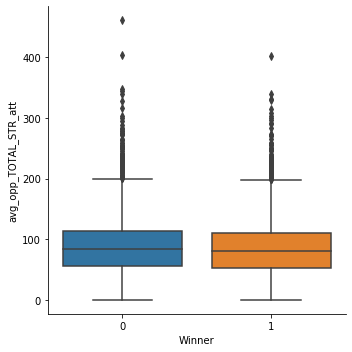

<Figure size 2160x936 with 0 Axes>

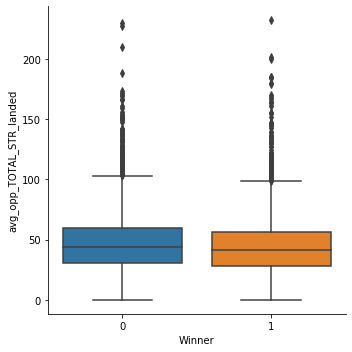

<Figure size 2160x936 with 0 Axes>

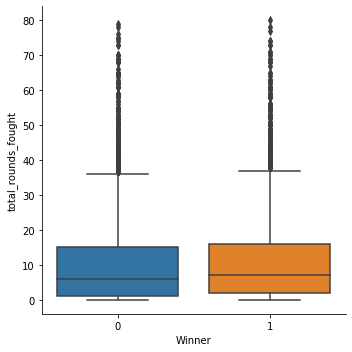

<Figure size 2160x936 with 0 Axes>

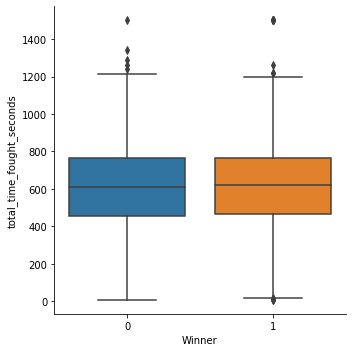

<Figure size 2160x936 with 0 Axes>

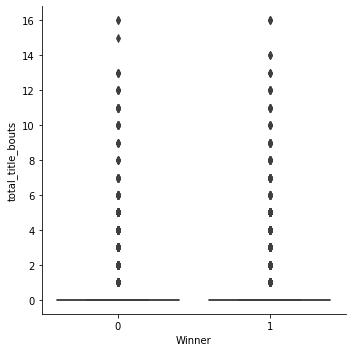

<Figure size 2160x936 with 0 Axes>

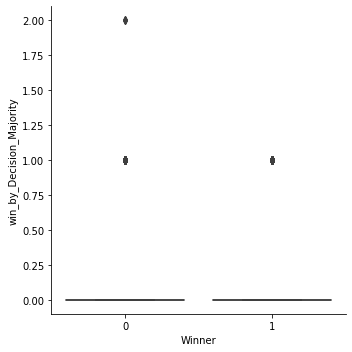

<Figure size 2160x936 with 0 Axes>

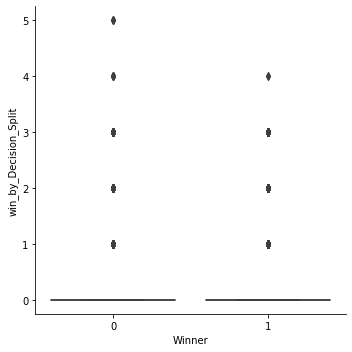

<Figure size 2160x936 with 0 Axes>

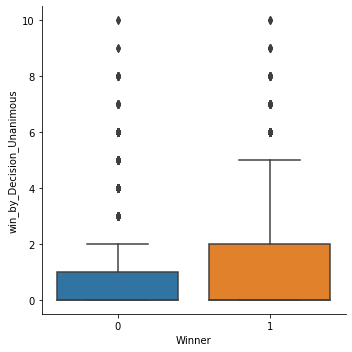

<Figure size 2160x936 with 0 Axes>

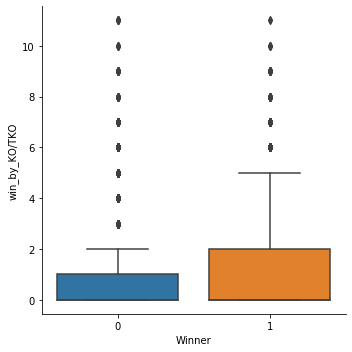

<Figure size 2160x936 with 0 Axes>

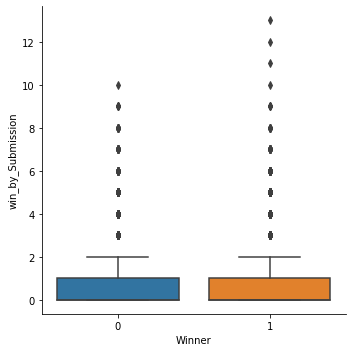

<Figure size 2160x936 with 0 Axes>

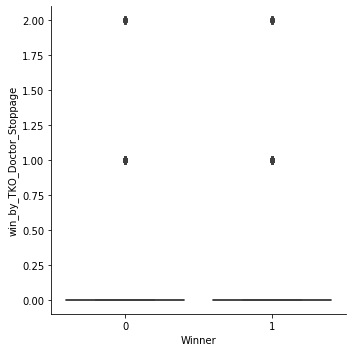

<Figure size 2160x936 with 0 Axes>

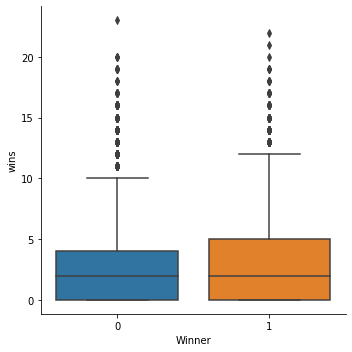

<Figure size 2160x936 with 0 Axes>

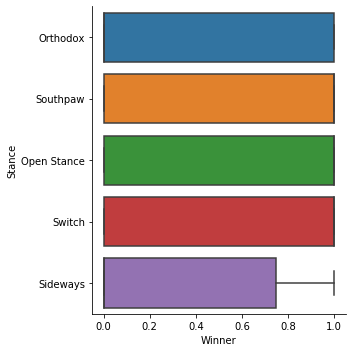

<Figure size 2160x936 with 0 Axes>

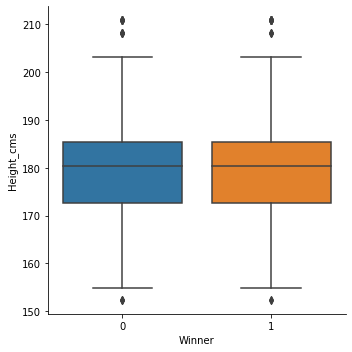

<Figure size 2160x936 with 0 Axes>

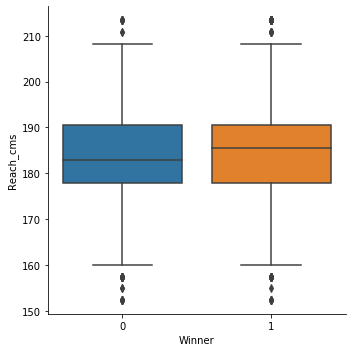

<Figure size 2160x936 with 0 Axes>

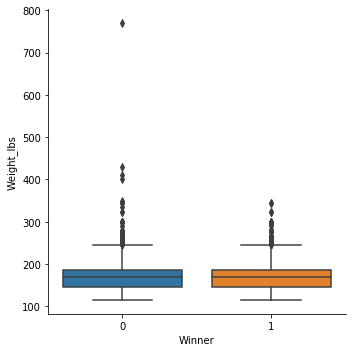

<Figure size 2160x936 with 0 Axes>

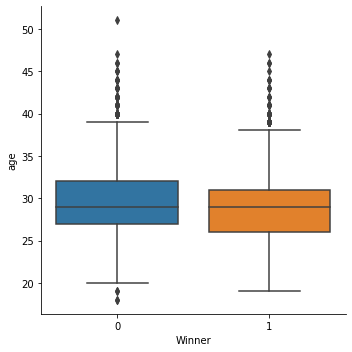

<Figure size 2160x936 with 0 Axes>

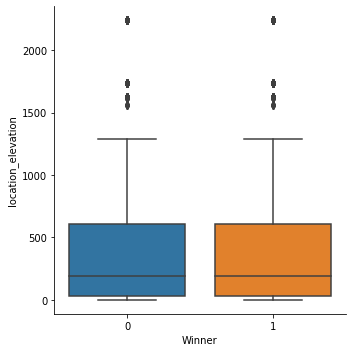

<Figure size 2160x936 with 0 Axes>

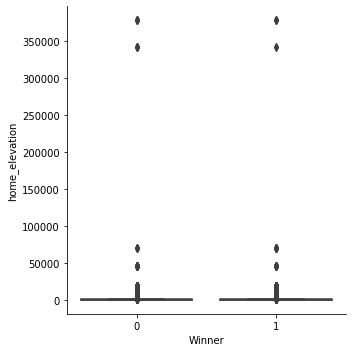

<Figure size 2160x936 with 0 Axes>

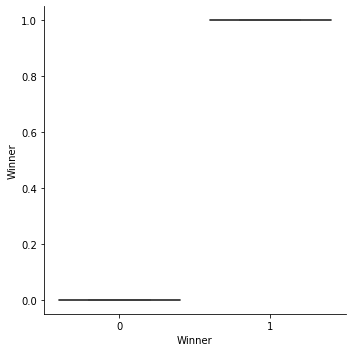

<Figure size 2160x936 with 0 Axes>

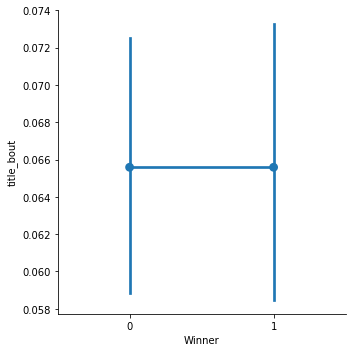

<Figure size 2160x936 with 0 Axes>

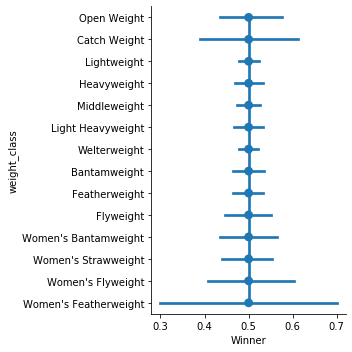

<Figure size 2160x936 with 0 Axes>

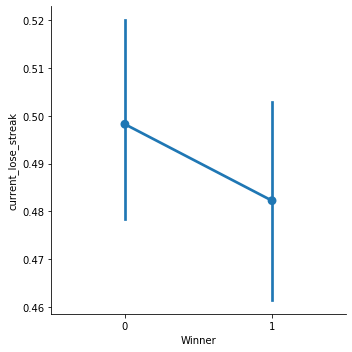

<Figure size 2160x936 with 0 Axes>

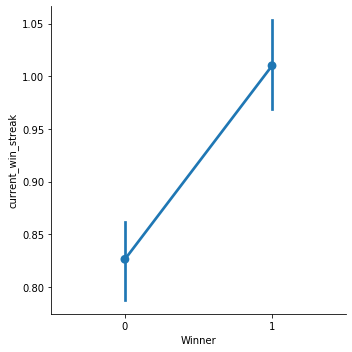

<Figure size 2160x936 with 0 Axes>

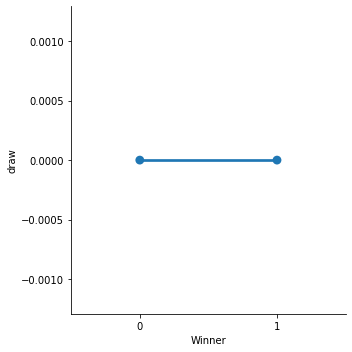

<Figure size 2160x936 with 0 Axes>

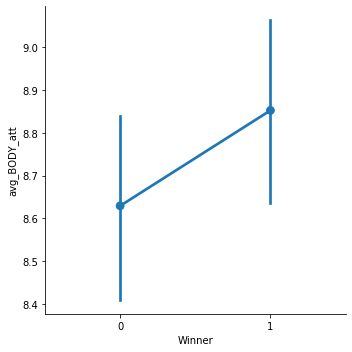

<Figure size 2160x936 with 0 Axes>

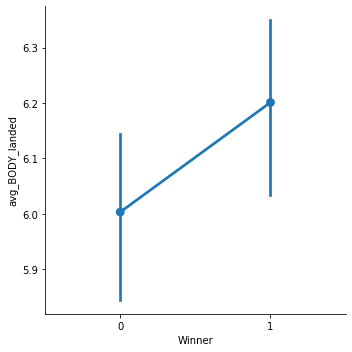

<Figure size 2160x936 with 0 Axes>

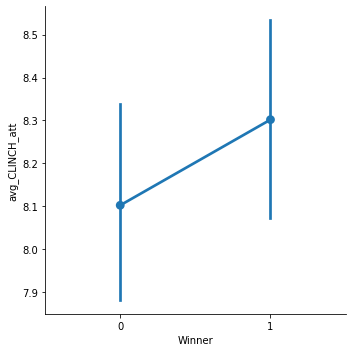

<Figure size 2160x936 with 0 Axes>

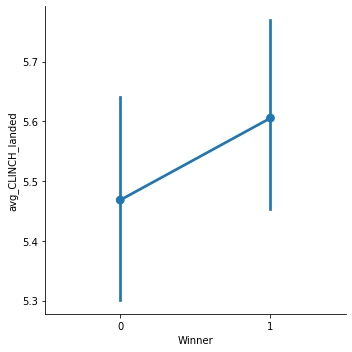

<Figure size 2160x936 with 0 Axes>

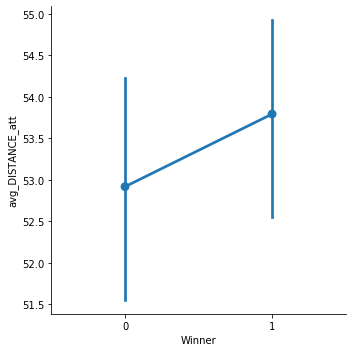

<Figure size 2160x936 with 0 Axes>

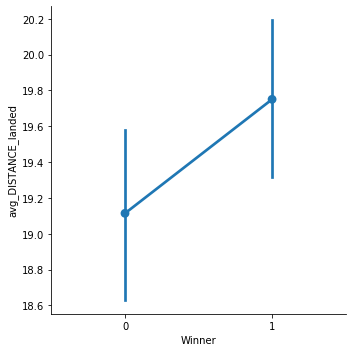

<Figure size 2160x936 with 0 Axes>

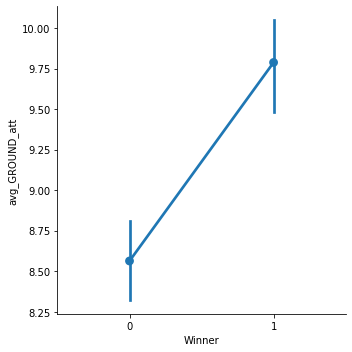

<Figure size 2160x936 with 0 Axes>

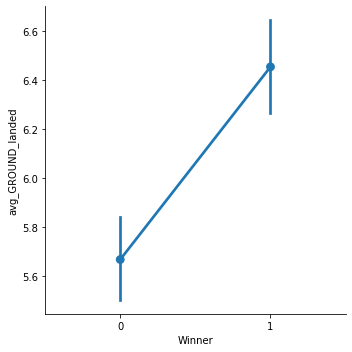

<Figure size 2160x936 with 0 Axes>

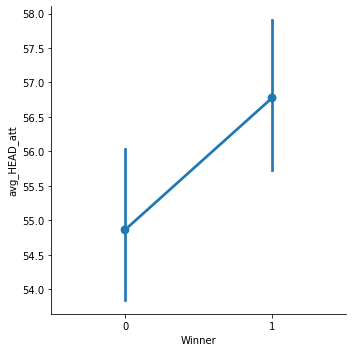

<Figure size 2160x936 with 0 Axes>

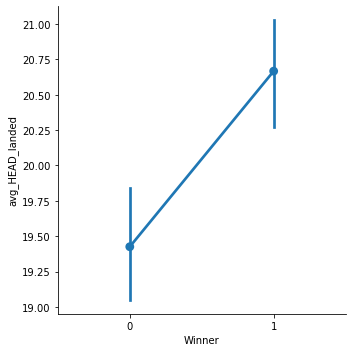

<Figure size 2160x936 with 0 Axes>

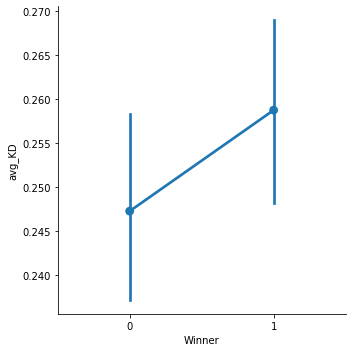

<Figure size 2160x936 with 0 Axes>

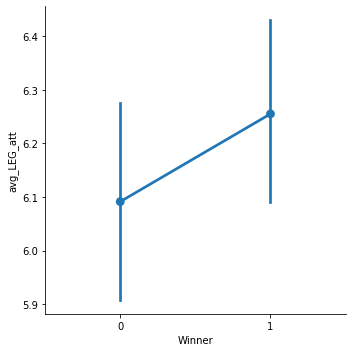

<Figure size 2160x936 with 0 Axes>

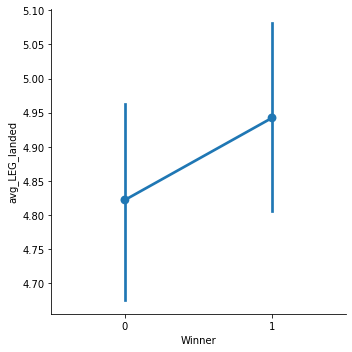

<Figure size 2160x936 with 0 Axes>

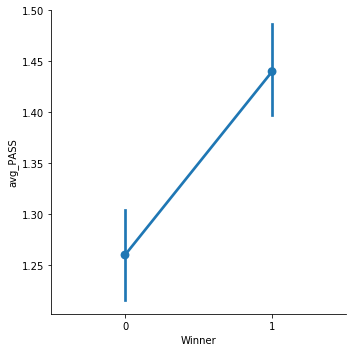

<Figure size 2160x936 with 0 Axes>

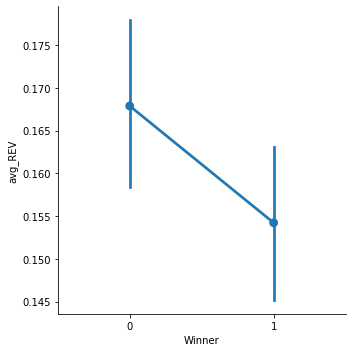

<Figure size 2160x936 with 0 Axes>

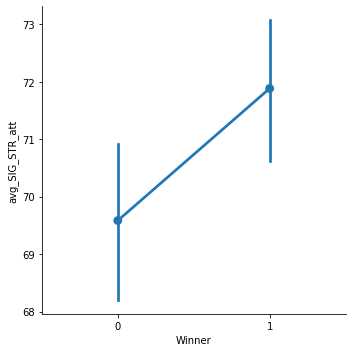

<Figure size 2160x936 with 0 Axes>

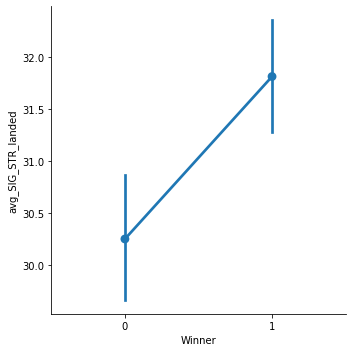

<Figure size 2160x936 with 0 Axes>

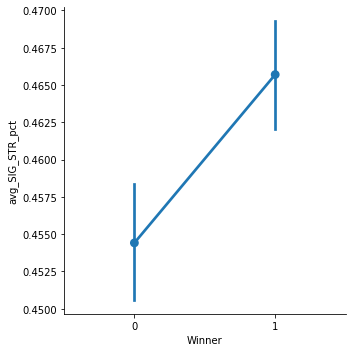

<Figure size 2160x936 with 0 Axes>

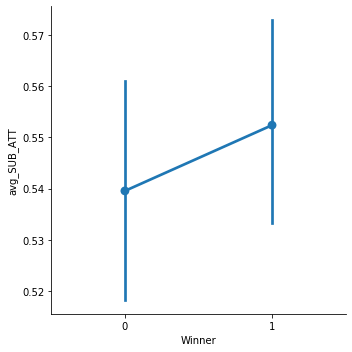

<Figure size 2160x936 with 0 Axes>

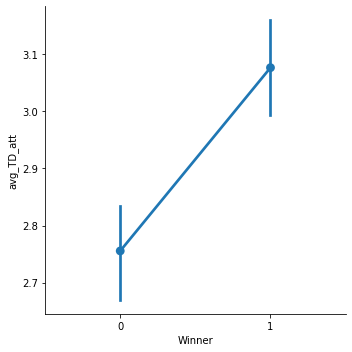

<Figure size 2160x936 with 0 Axes>

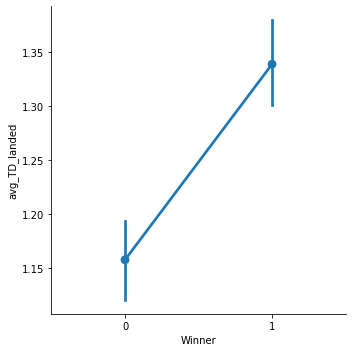

<Figure size 2160x936 with 0 Axes>

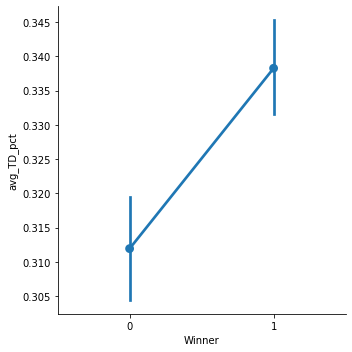

<Figure size 2160x936 with 0 Axes>

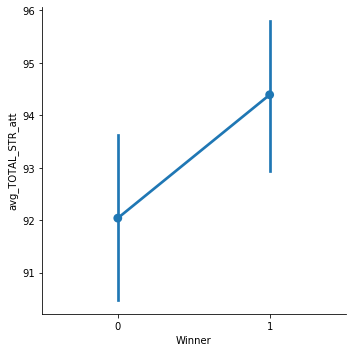

<Figure size 2160x936 with 0 Axes>

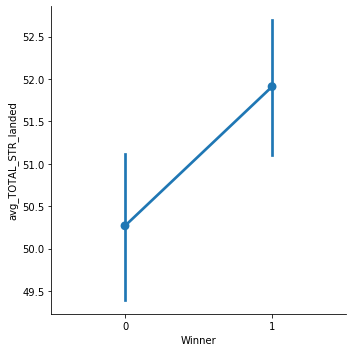

<Figure size 2160x936 with 0 Axes>

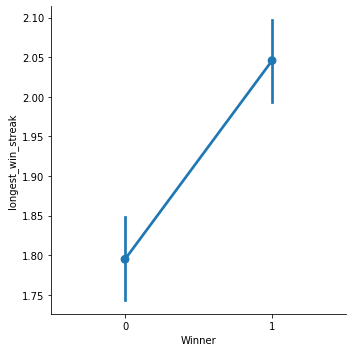

<Figure size 2160x936 with 0 Axes>

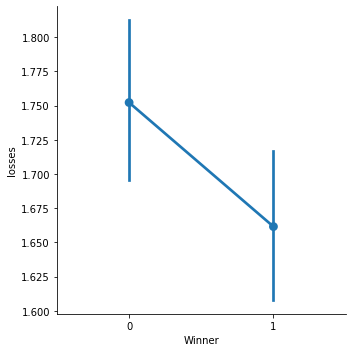

<Figure size 2160x936 with 0 Axes>

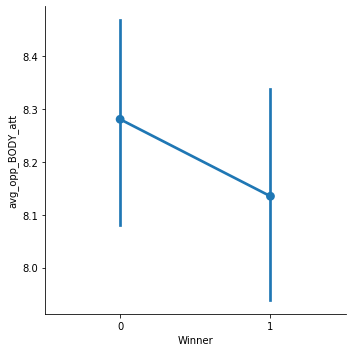

<Figure size 2160x936 with 0 Axes>

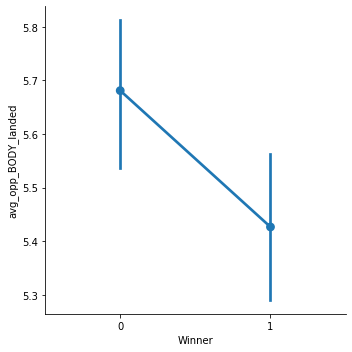

<Figure size 2160x936 with 0 Axes>

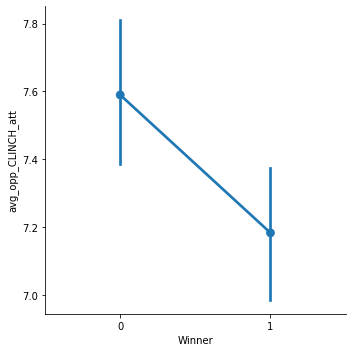

<Figure size 2160x936 with 0 Axes>

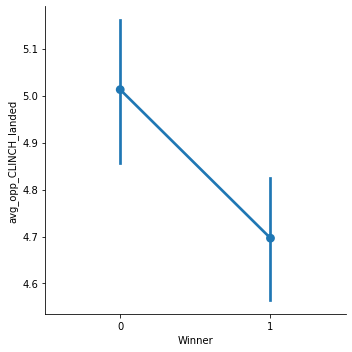

<Figure size 2160x936 with 0 Axes>

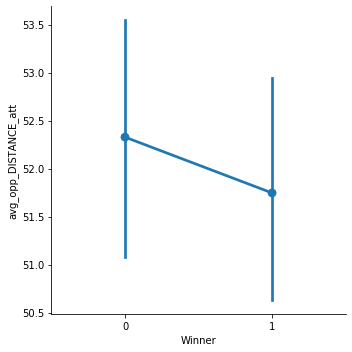

<Figure size 2160x936 with 0 Axes>

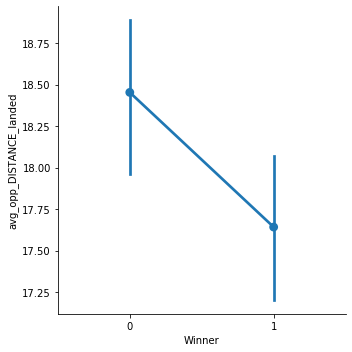

<Figure size 2160x936 with 0 Axes>

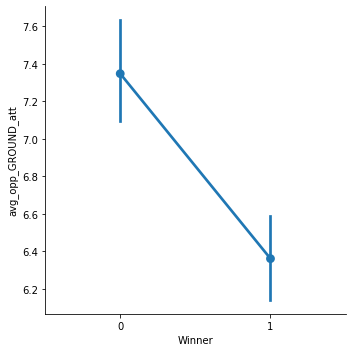

<Figure size 2160x936 with 0 Axes>

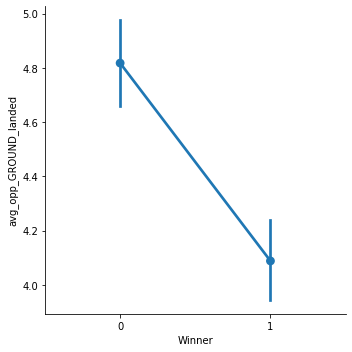

<Figure size 2160x936 with 0 Axes>

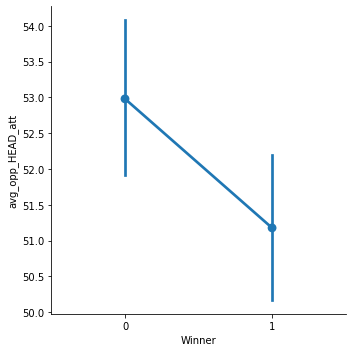

<Figure size 2160x936 with 0 Axes>

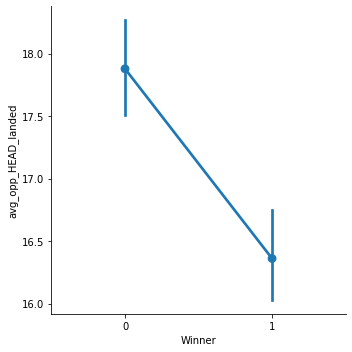

<Figure size 2160x936 with 0 Axes>

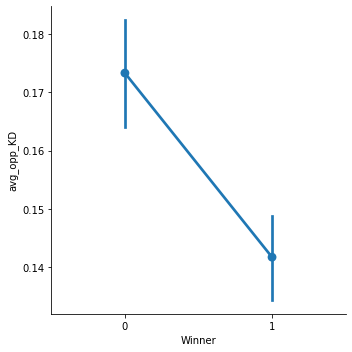

<Figure size 2160x936 with 0 Axes>

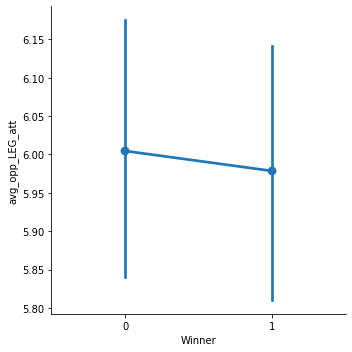

<Figure size 2160x936 with 0 Axes>

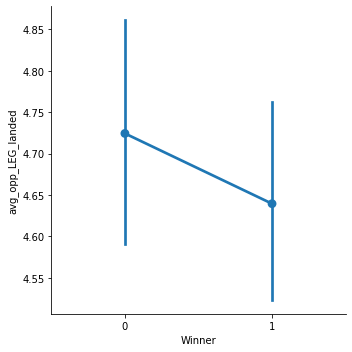

<Figure size 2160x936 with 0 Axes>

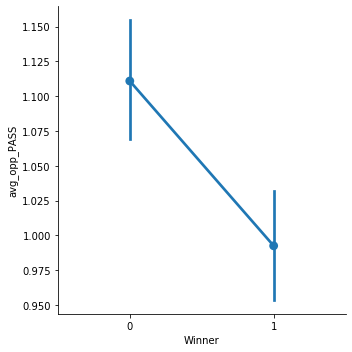

<Figure size 2160x936 with 0 Axes>

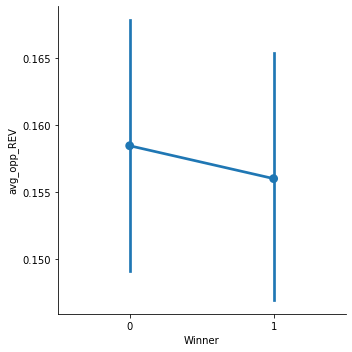

<Figure size 2160x936 with 0 Axes>

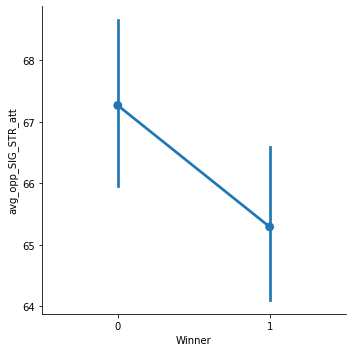

<Figure size 2160x936 with 0 Axes>

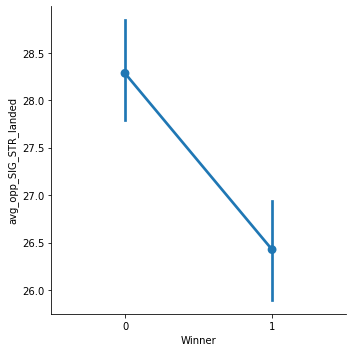

<Figure size 2160x936 with 0 Axes>

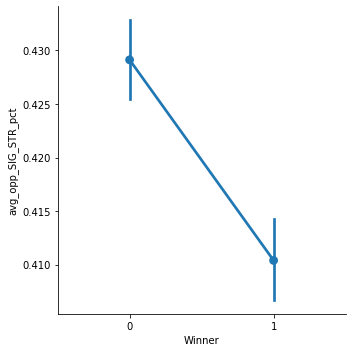

<Figure size 2160x936 with 0 Axes>

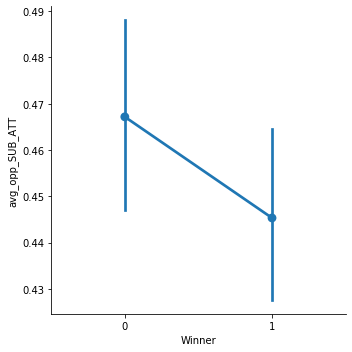

<Figure size 2160x936 with 0 Axes>

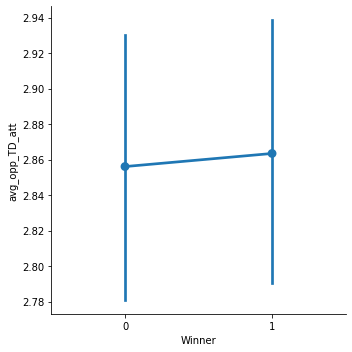

<Figure size 2160x936 with 0 Axes>

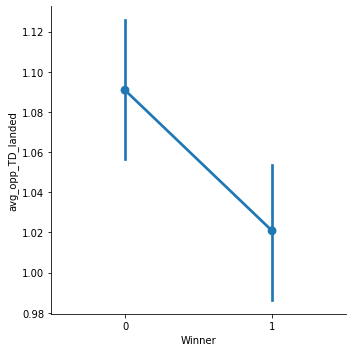

<Figure size 2160x936 with 0 Axes>

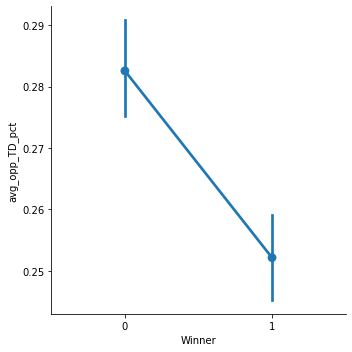

<Figure size 2160x936 with 0 Axes>

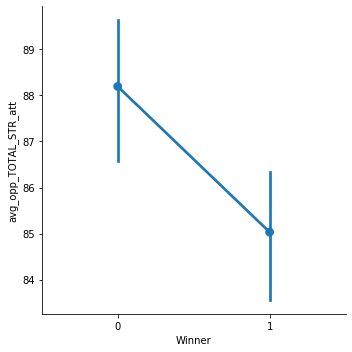

<Figure size 2160x936 with 0 Axes>

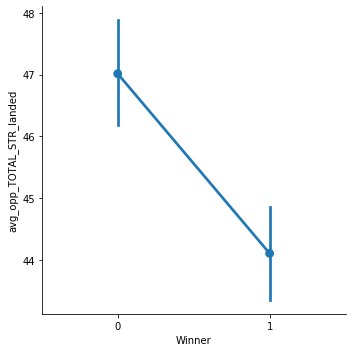

<Figure size 2160x936 with 0 Axes>

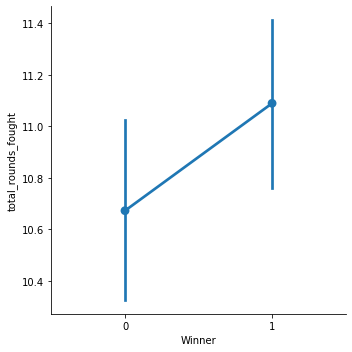

<Figure size 2160x936 with 0 Axes>

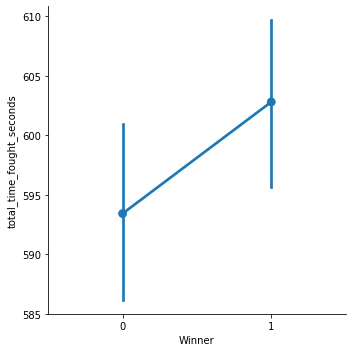

<Figure size 2160x936 with 0 Axes>

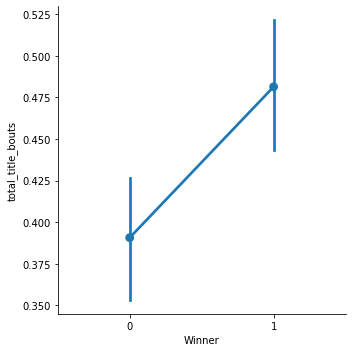

<Figure size 2160x936 with 0 Axes>

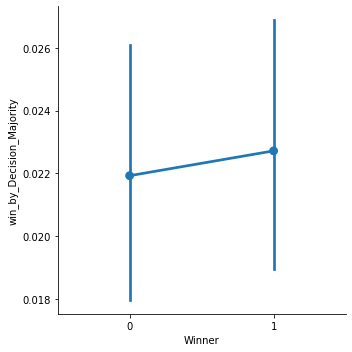

<Figure size 2160x936 with 0 Axes>

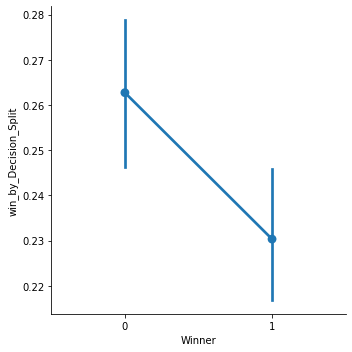

<Figure size 2160x936 with 0 Axes>

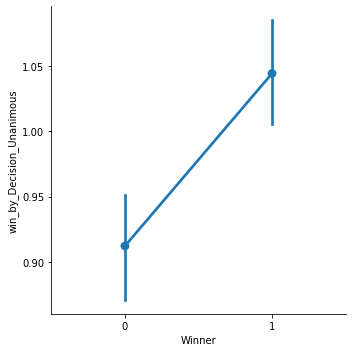

<Figure size 2160x936 with 0 Axes>

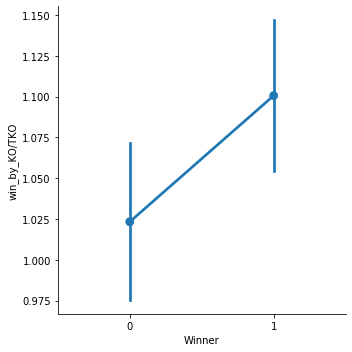

<Figure size 2160x936 with 0 Axes>

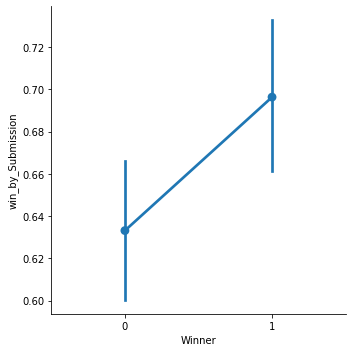

<Figure size 2160x936 with 0 Axes>

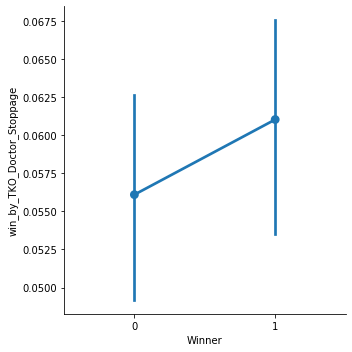

<Figure size 2160x936 with 0 Axes>

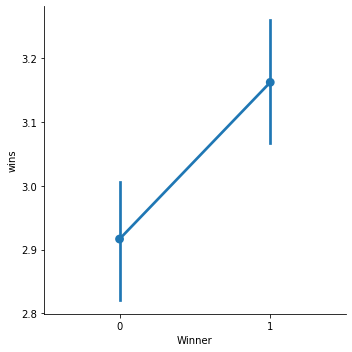

<Figure size 2160x936 with 0 Axes>

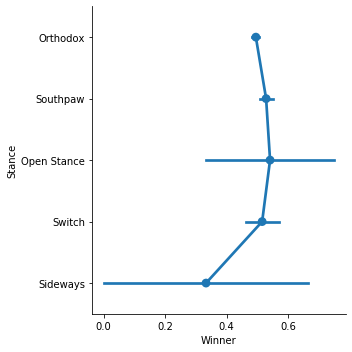

<Figure size 2160x936 with 0 Axes>

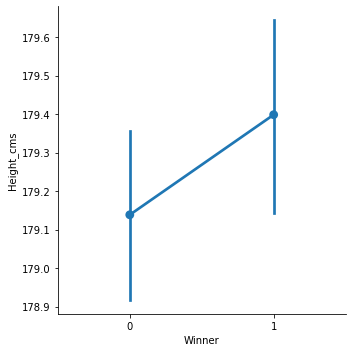

<Figure size 2160x936 with 0 Axes>

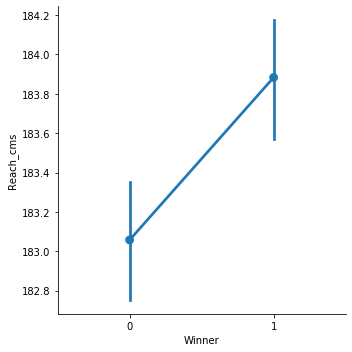

<Figure size 2160x936 with 0 Axes>

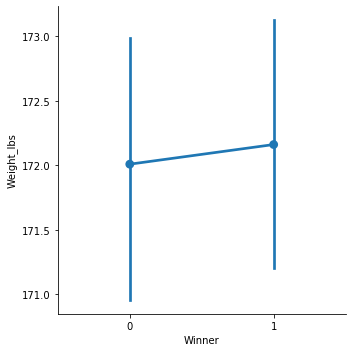

<Figure size 2160x936 with 0 Axes>

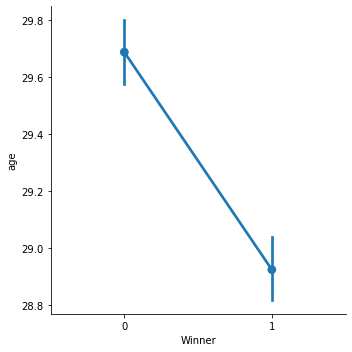

<Figure size 2160x936 with 0 Axes>

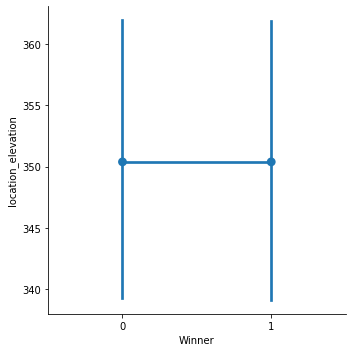

<Figure size 2160x936 with 0 Axes>

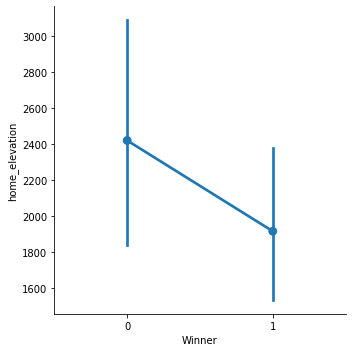

<Figure size 2160x936 with 0 Axes>

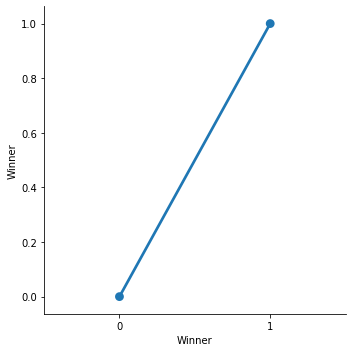

In [16]:
def inspect_data(df, kind, columns):
    for column in columns:
        try:
            fig = plt.figure(figsize=(30, 13))
            sns.catplot(x='Winner', y=column, data=df, kind=kind);
            plt.show()
        except:
            pass

#Inspect data for all categorical features
kinds = ['box', 'point']
df = data.drop(columns=['fighter', 'city', 'country'])
for kind in kinds:
    inspect_data(df, kind, df.columns)
    

<Figure size 2160x936 with 0 Axes>

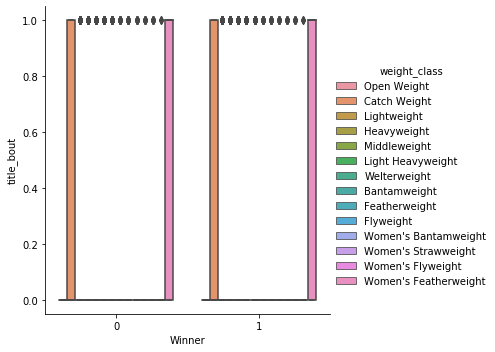

<Figure size 2160x936 with 0 Axes>

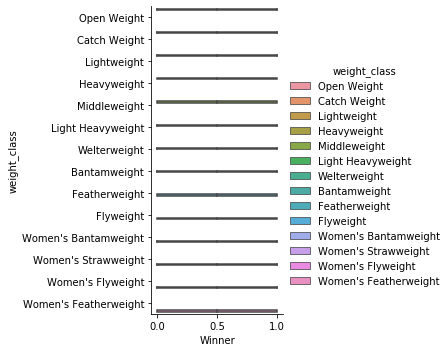

<Figure size 2160x936 with 0 Axes>

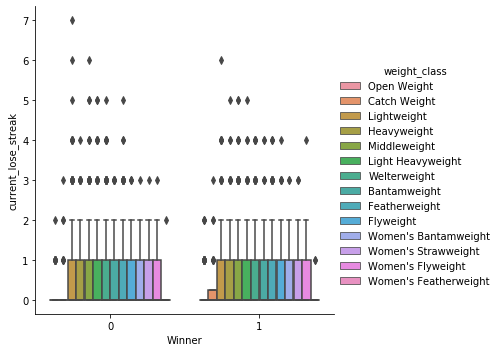

<Figure size 2160x936 with 0 Axes>

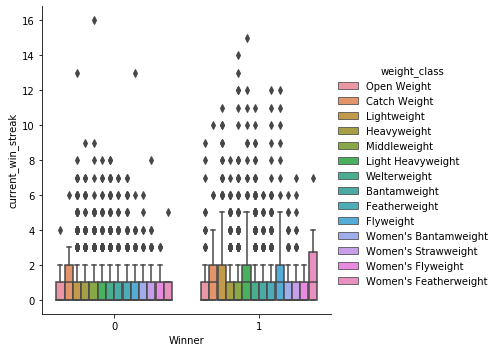

<Figure size 2160x936 with 0 Axes>

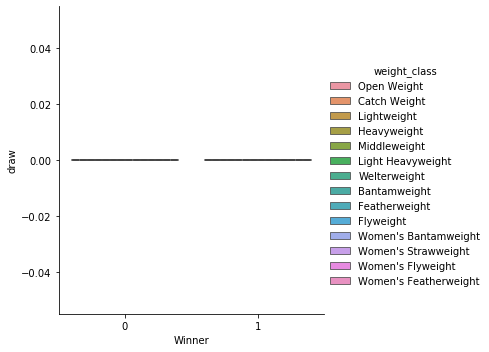

<Figure size 2160x936 with 0 Axes>

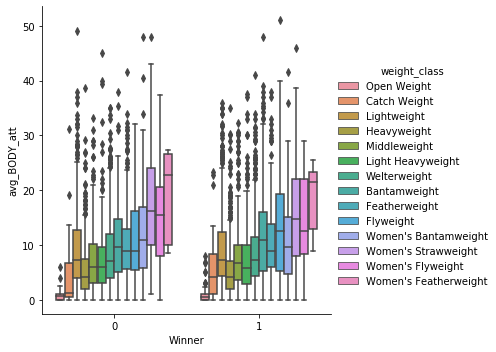

<Figure size 2160x936 with 0 Axes>

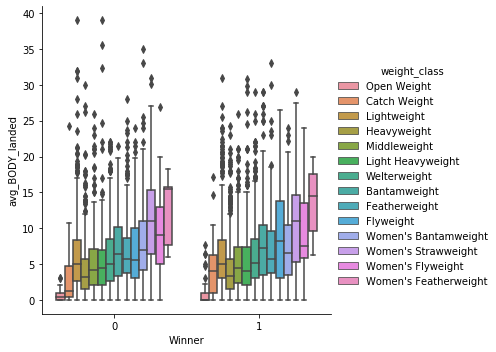

<Figure size 2160x936 with 0 Axes>

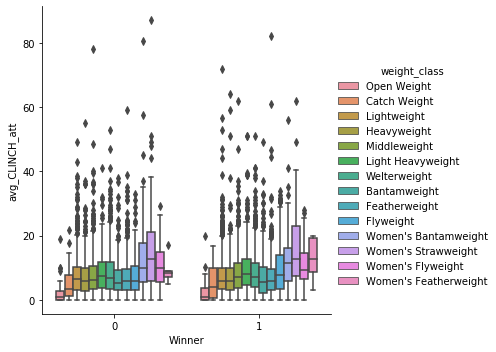

<Figure size 2160x936 with 0 Axes>

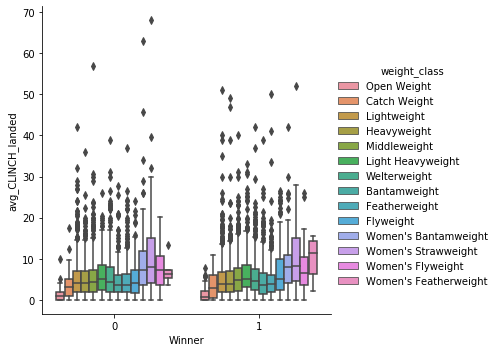

<Figure size 2160x936 with 0 Axes>

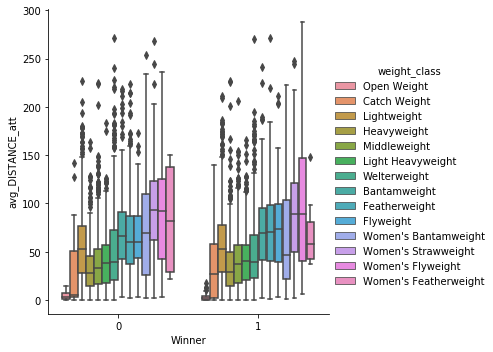

<Figure size 2160x936 with 0 Axes>

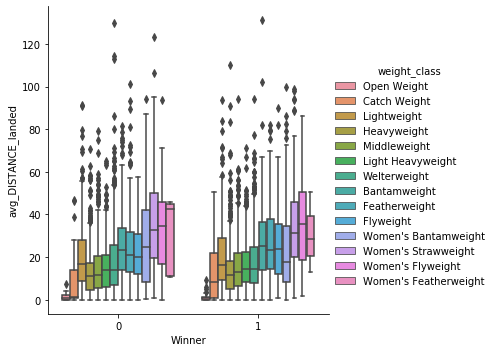

<Figure size 2160x936 with 0 Axes>

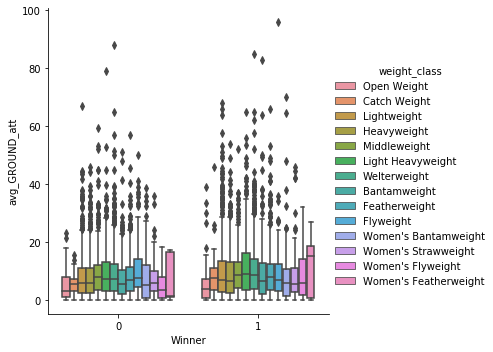

<Figure size 2160x936 with 0 Axes>

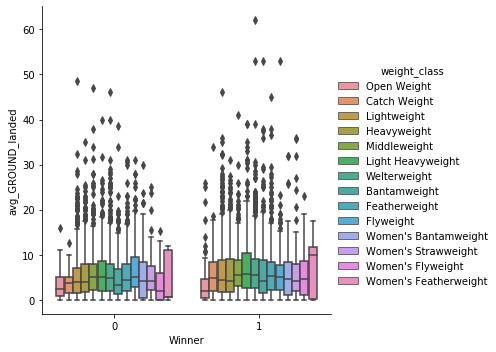

<Figure size 2160x936 with 0 Axes>

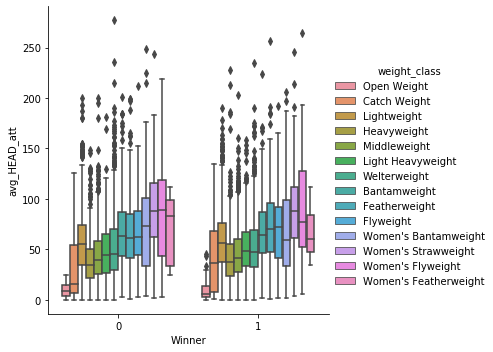

<Figure size 2160x936 with 0 Axes>

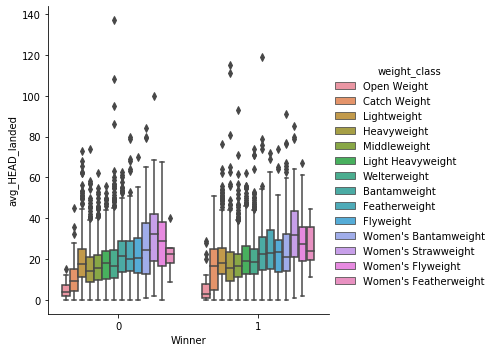

<Figure size 2160x936 with 0 Axes>

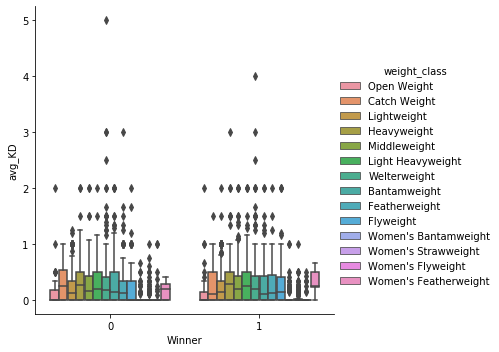

<Figure size 2160x936 with 0 Axes>

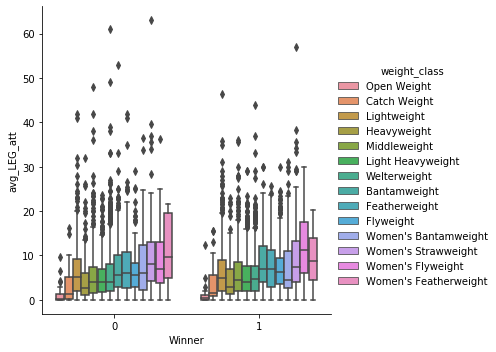

<Figure size 2160x936 with 0 Axes>

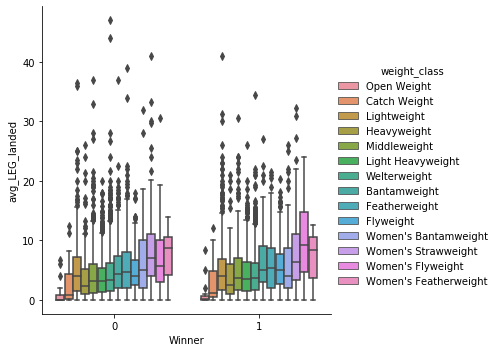

<Figure size 2160x936 with 0 Axes>

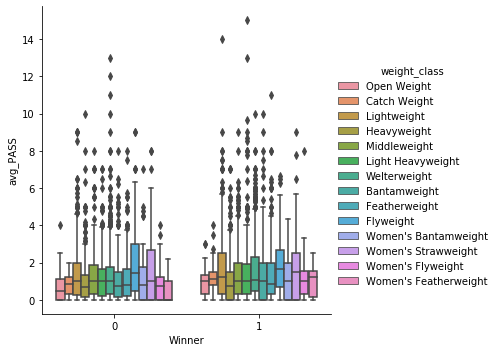

<Figure size 2160x936 with 0 Axes>

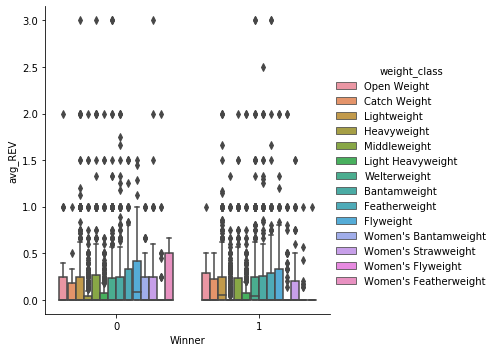

<Figure size 2160x936 with 0 Axes>

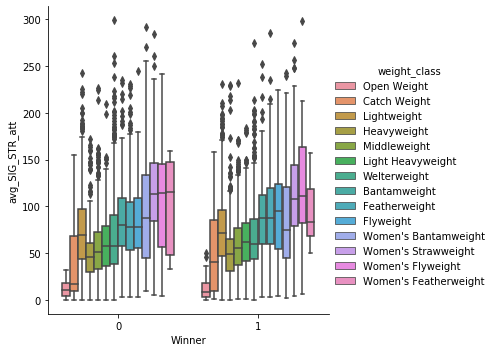

<Figure size 2160x936 with 0 Axes>

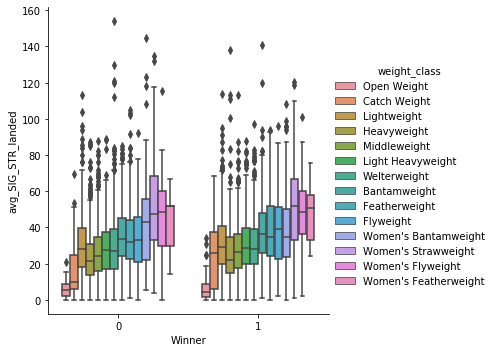

<Figure size 2160x936 with 0 Axes>

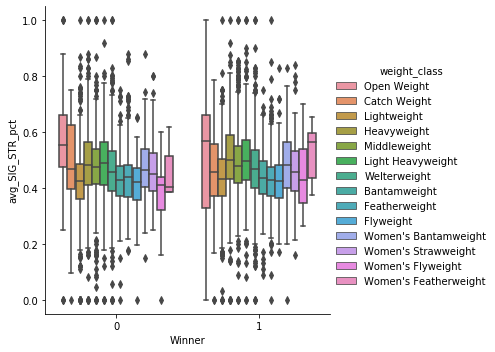

<Figure size 2160x936 with 0 Axes>

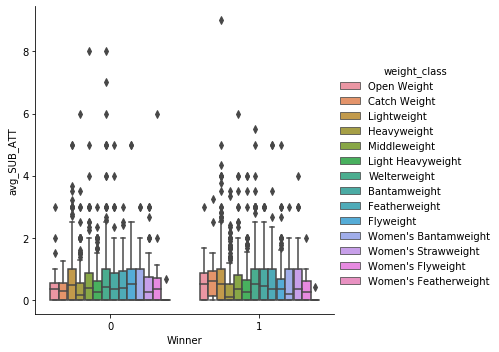

<Figure size 2160x936 with 0 Axes>

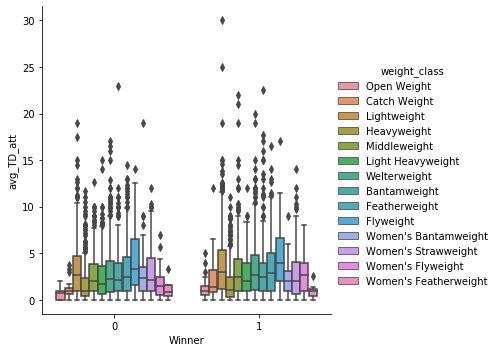

<Figure size 2160x936 with 0 Axes>

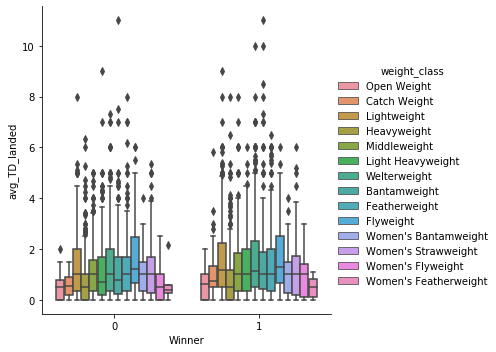

<Figure size 2160x936 with 0 Axes>

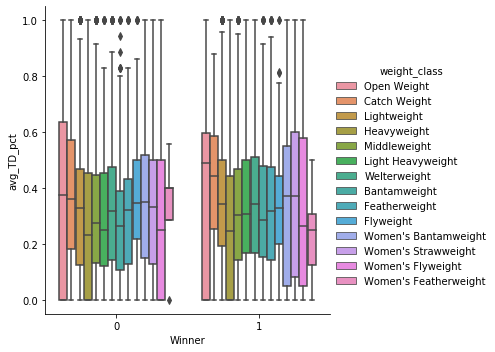

<Figure size 2160x936 with 0 Axes>

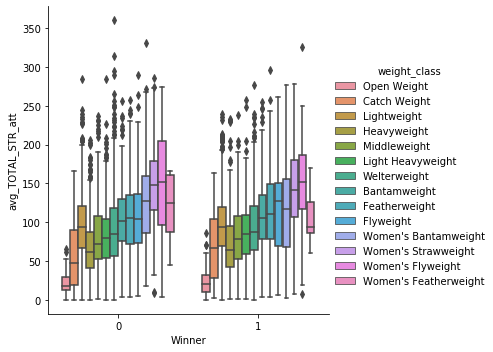

<Figure size 2160x936 with 0 Axes>

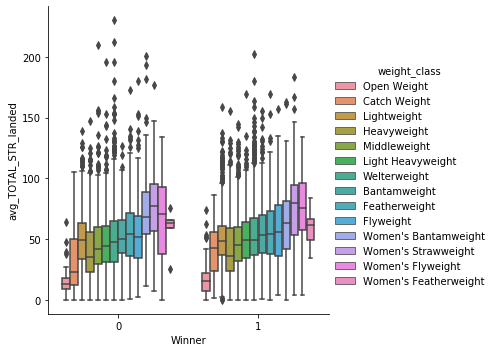

<Figure size 2160x936 with 0 Axes>

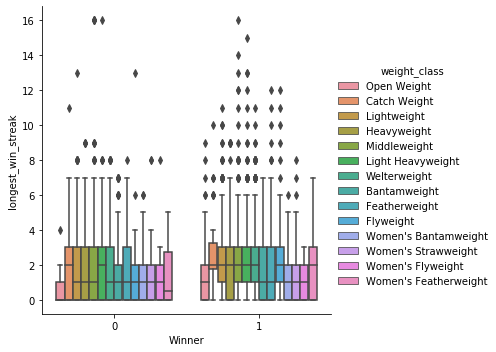

<Figure size 2160x936 with 0 Axes>

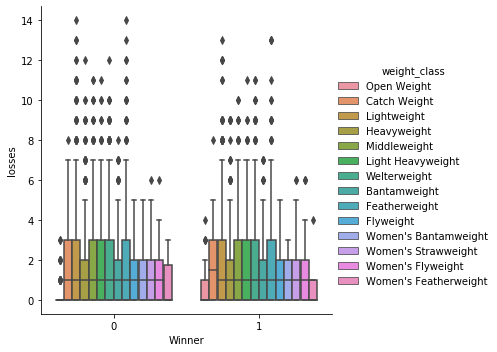

<Figure size 2160x936 with 0 Axes>

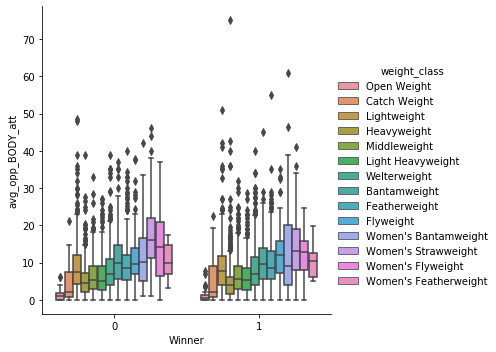

<Figure size 2160x936 with 0 Axes>

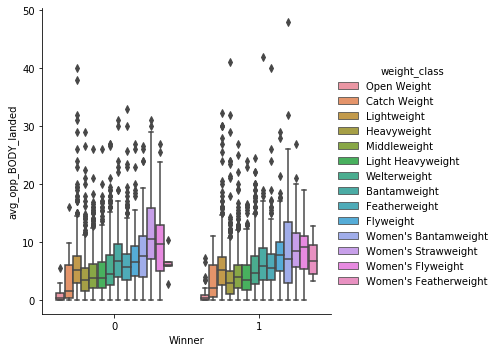

<Figure size 2160x936 with 0 Axes>

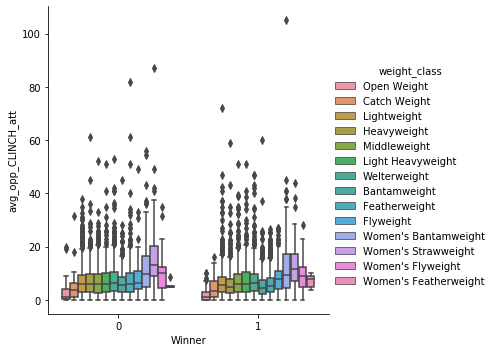

<Figure size 2160x936 with 0 Axes>

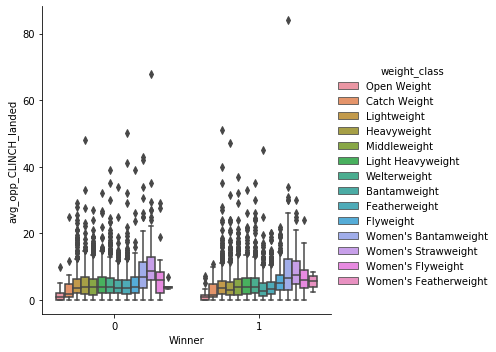

<Figure size 2160x936 with 0 Axes>

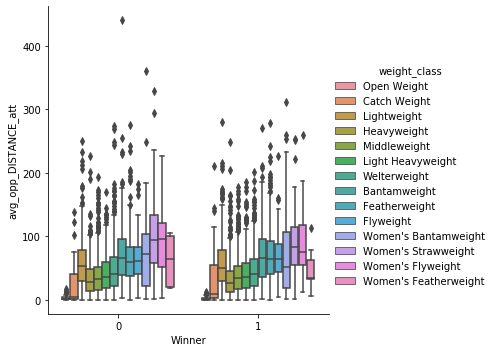

<Figure size 2160x936 with 0 Axes>

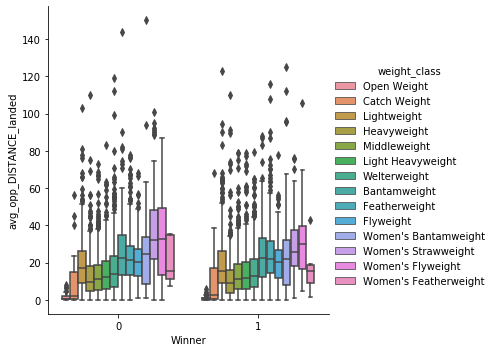

<Figure size 2160x936 with 0 Axes>

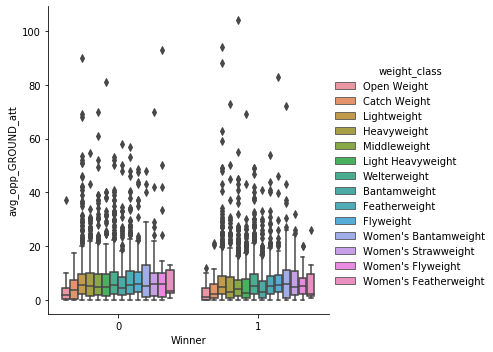

<Figure size 2160x936 with 0 Axes>

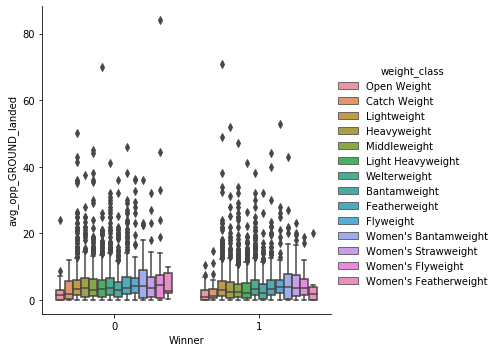

<Figure size 2160x936 with 0 Axes>

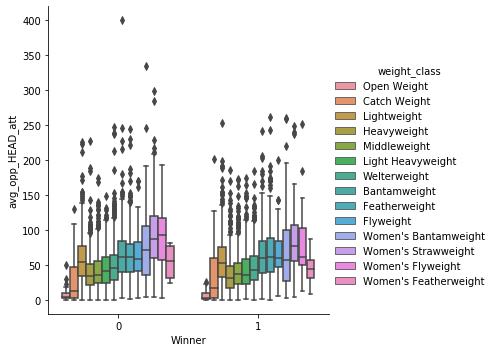

<Figure size 2160x936 with 0 Axes>

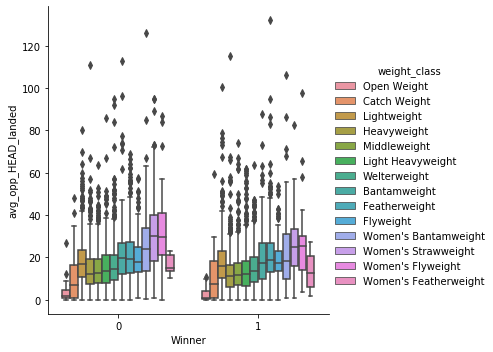

<Figure size 2160x936 with 0 Axes>

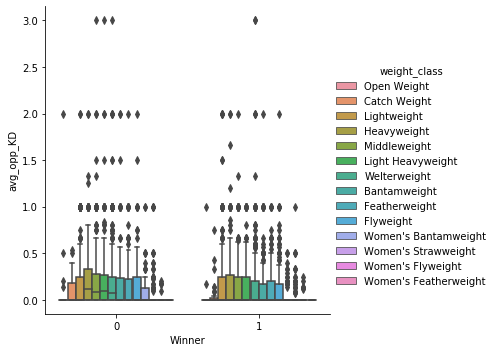

<Figure size 2160x936 with 0 Axes>

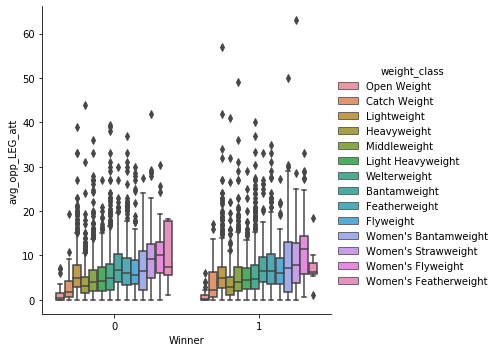

<Figure size 2160x936 with 0 Axes>

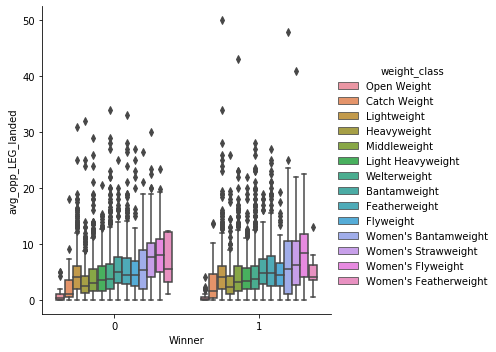

<Figure size 2160x936 with 0 Axes>

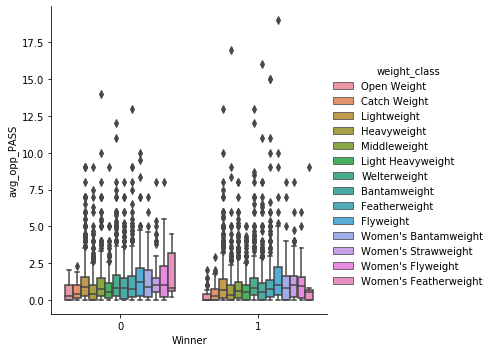

<Figure size 2160x936 with 0 Axes>

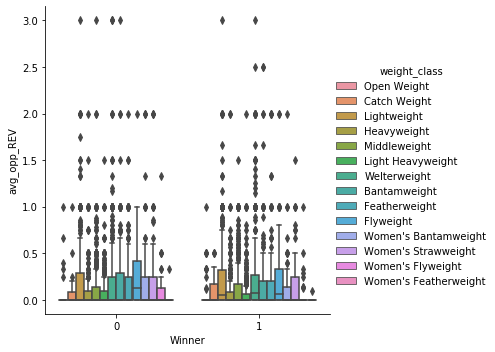

<Figure size 2160x936 with 0 Axes>

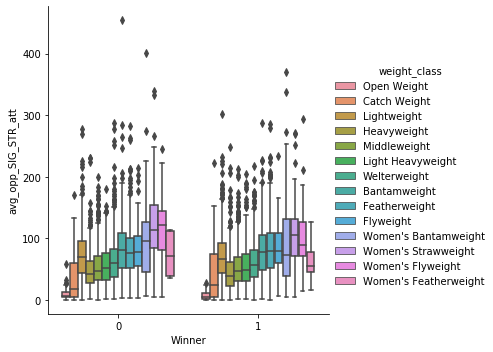

<Figure size 2160x936 with 0 Axes>

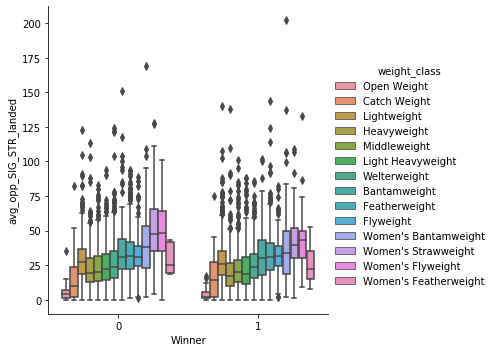

<Figure size 2160x936 with 0 Axes>

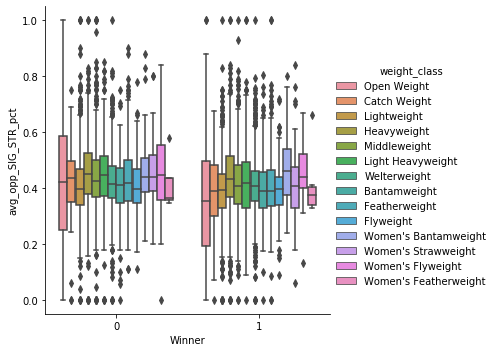

<Figure size 2160x936 with 0 Axes>

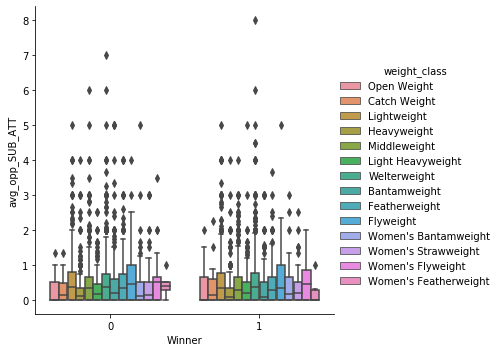

<Figure size 2160x936 with 0 Axes>

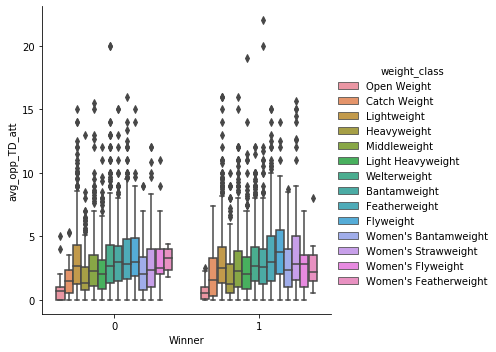

<Figure size 2160x936 with 0 Axes>

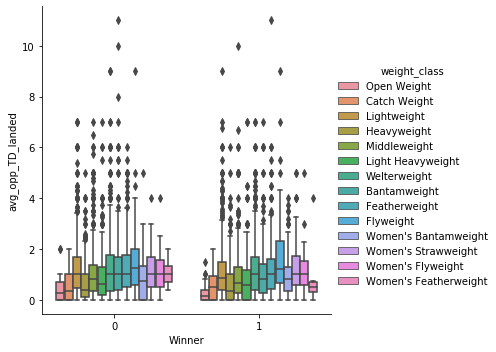

<Figure size 2160x936 with 0 Axes>

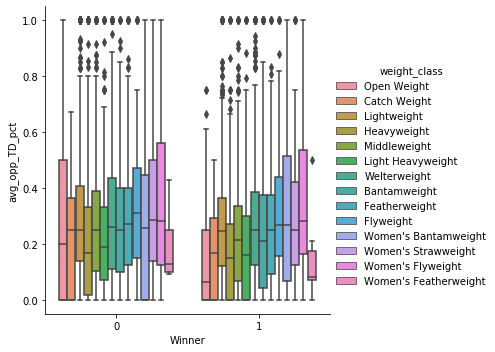

<Figure size 2160x936 with 0 Axes>

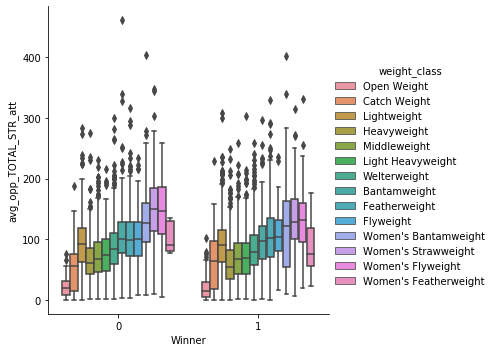

<Figure size 2160x936 with 0 Axes>

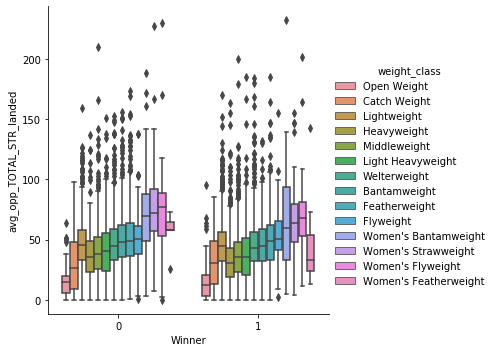

<Figure size 2160x936 with 0 Axes>

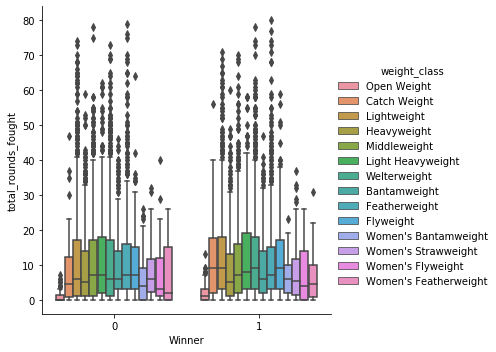

<Figure size 2160x936 with 0 Axes>

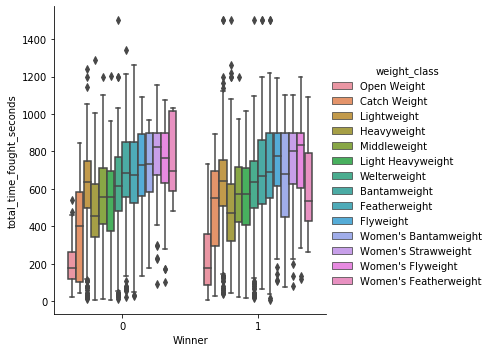

<Figure size 2160x936 with 0 Axes>

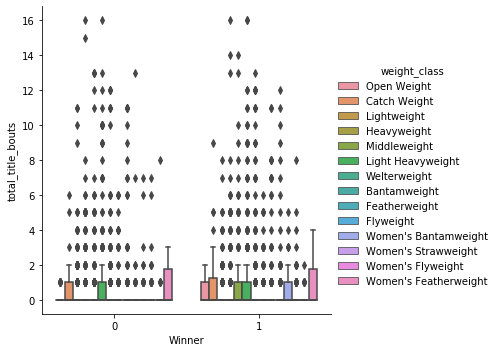

<Figure size 2160x936 with 0 Axes>

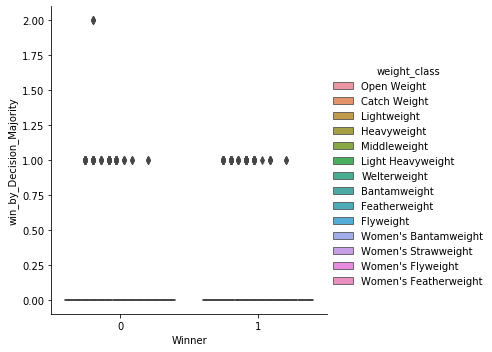

<Figure size 2160x936 with 0 Axes>

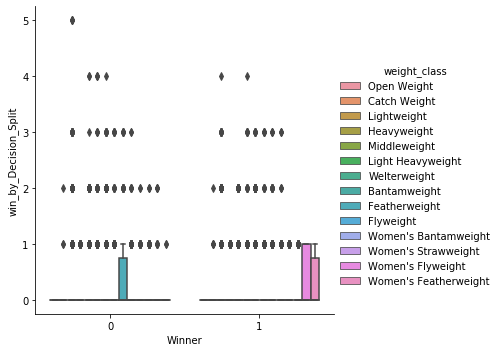

<Figure size 2160x936 with 0 Axes>

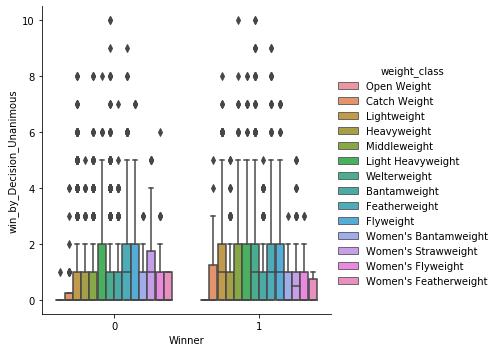

<Figure size 2160x936 with 0 Axes>

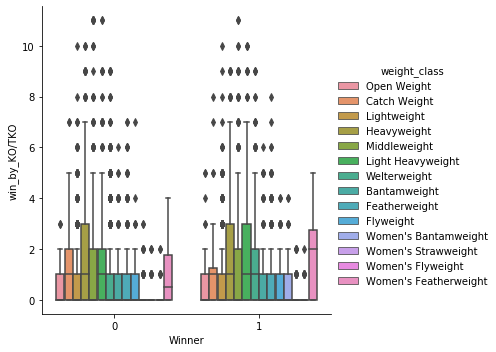

<Figure size 2160x936 with 0 Axes>

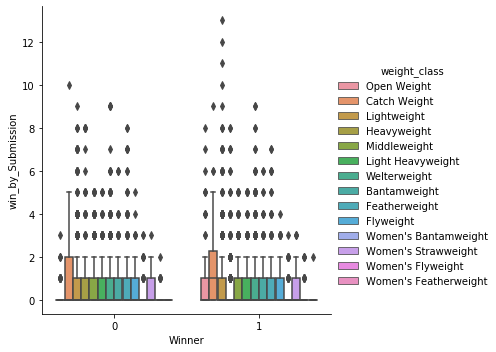

<Figure size 2160x936 with 0 Axes>

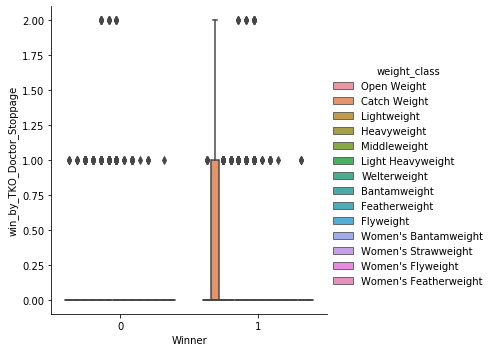

<Figure size 2160x936 with 0 Axes>

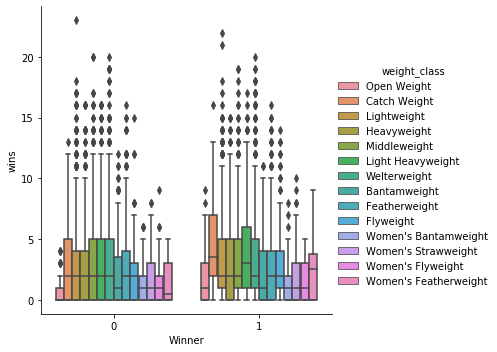

<Figure size 2160x936 with 0 Axes>

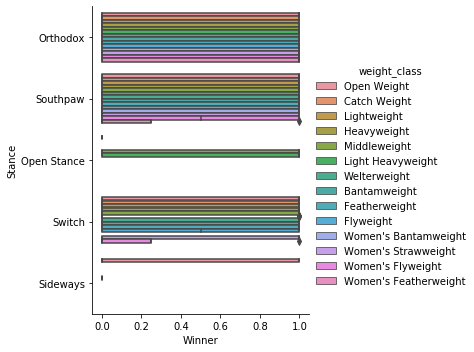

<Figure size 2160x936 with 0 Axes>

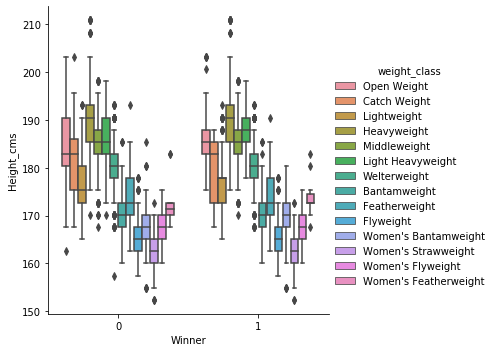

<Figure size 2160x936 with 0 Axes>

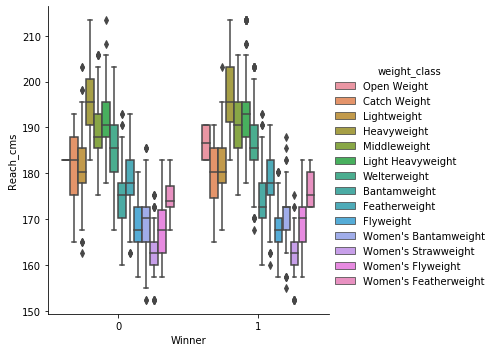

<Figure size 2160x936 with 0 Axes>

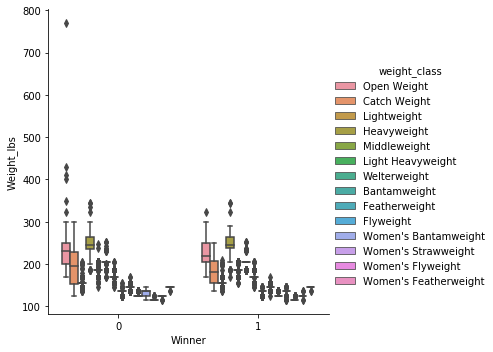

<Figure size 2160x936 with 0 Axes>

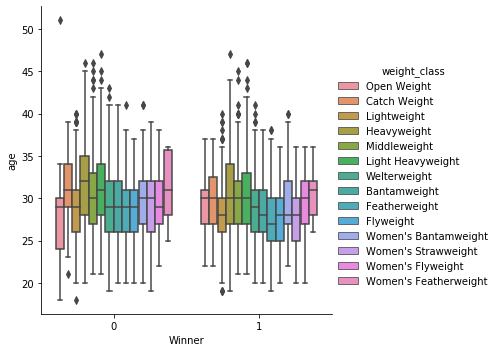

<Figure size 2160x936 with 0 Axes>

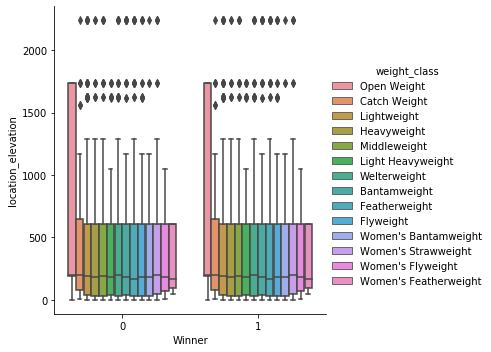

<Figure size 2160x936 with 0 Axes>

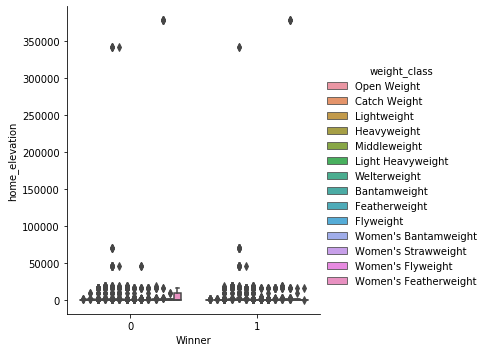

<Figure size 2160x936 with 0 Axes>

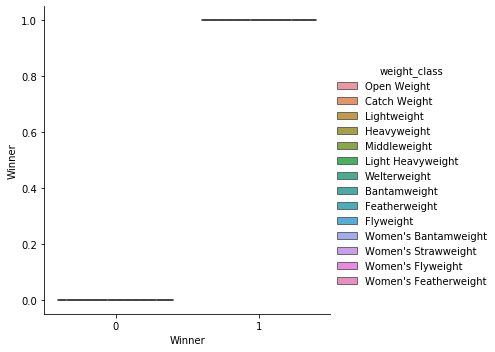

<Figure size 2160x936 with 0 Axes>

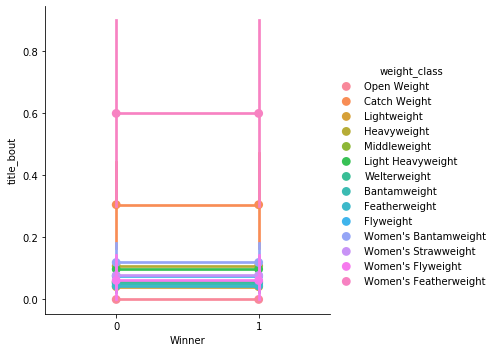

<Figure size 2160x936 with 0 Axes>

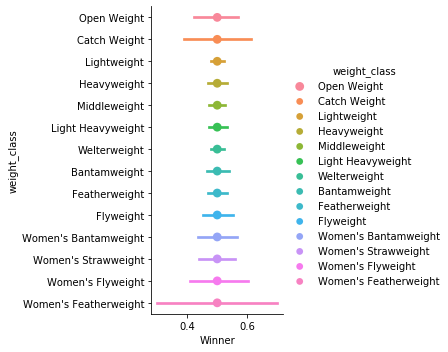

<Figure size 2160x936 with 0 Axes>

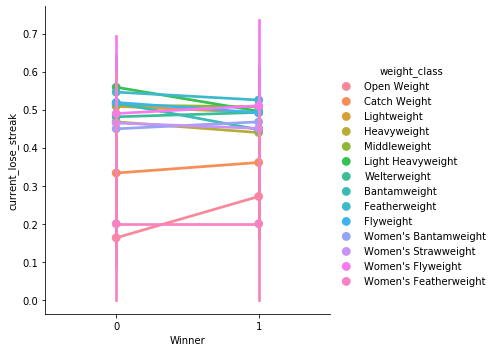

<Figure size 2160x936 with 0 Axes>

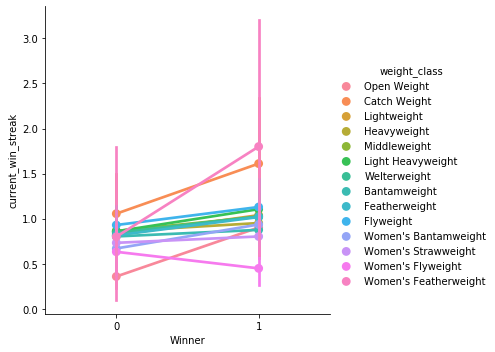

<Figure size 2160x936 with 0 Axes>

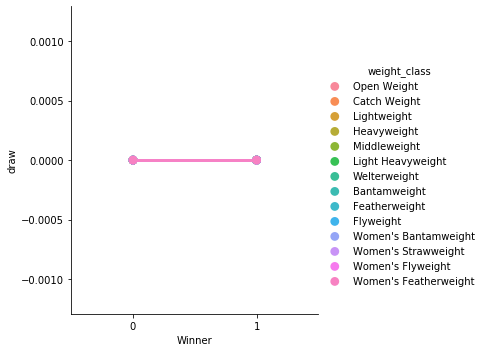

<Figure size 2160x936 with 0 Axes>

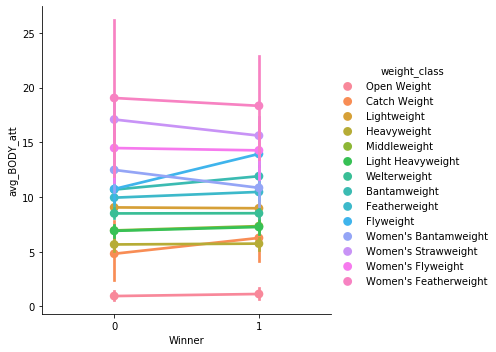

<Figure size 2160x936 with 0 Axes>

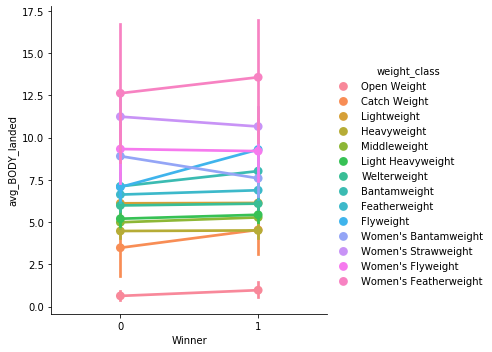

<Figure size 2160x936 with 0 Axes>

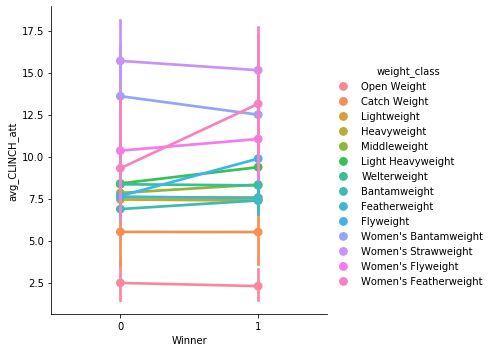

<Figure size 2160x936 with 0 Axes>

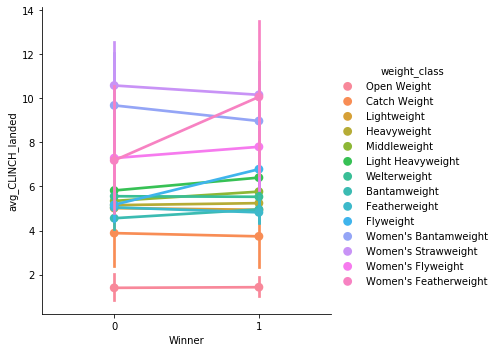

<Figure size 2160x936 with 0 Axes>

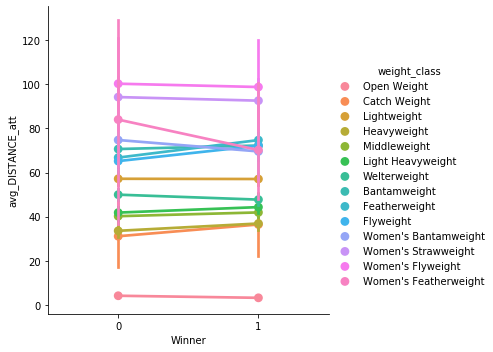

<Figure size 2160x936 with 0 Axes>

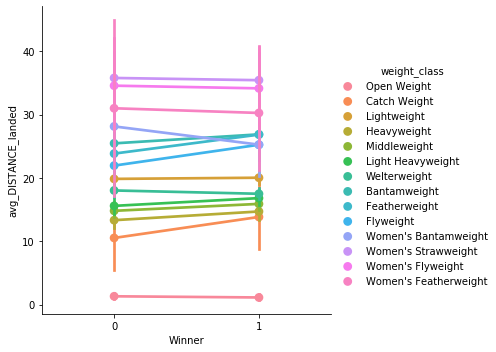

<Figure size 2160x936 with 0 Axes>

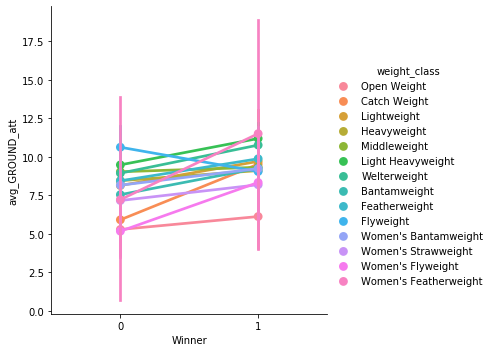

<Figure size 2160x936 with 0 Axes>

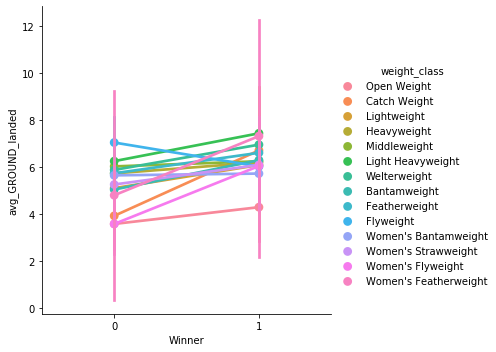

<Figure size 2160x936 with 0 Axes>

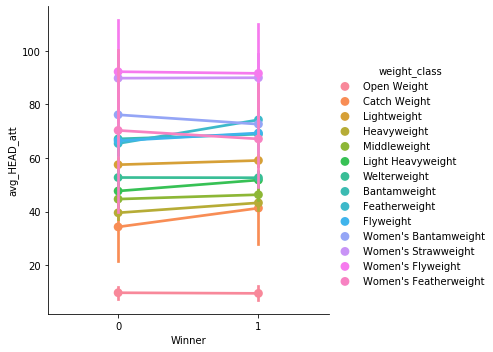

<Figure size 2160x936 with 0 Axes>

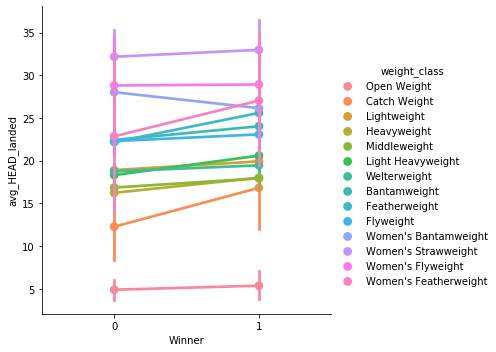

<Figure size 2160x936 with 0 Axes>

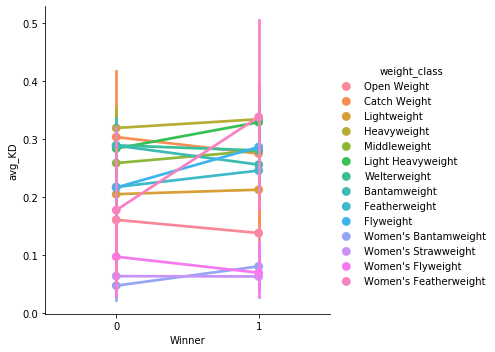

<Figure size 2160x936 with 0 Axes>

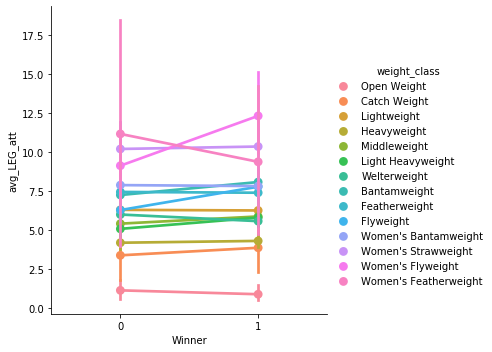

<Figure size 2160x936 with 0 Axes>

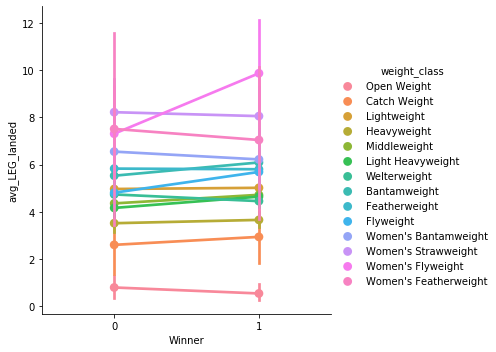

<Figure size 2160x936 with 0 Axes>

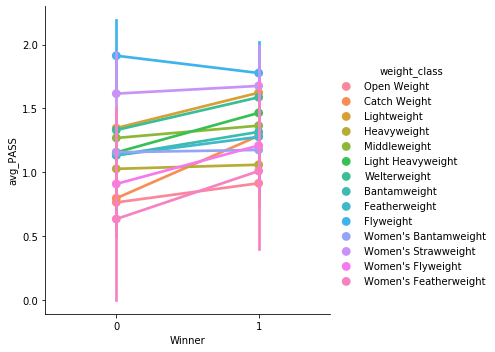

<Figure size 2160x936 with 0 Axes>

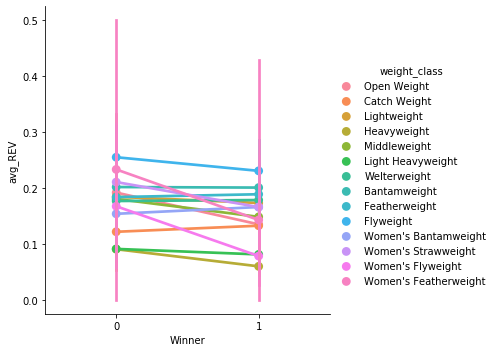

<Figure size 2160x936 with 0 Axes>

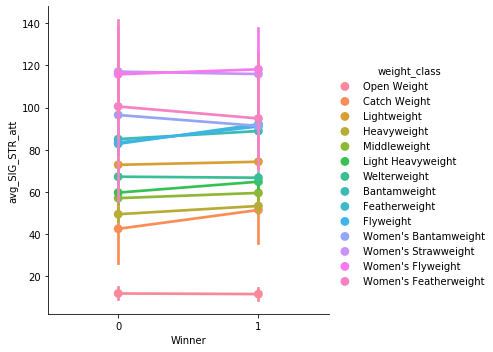

<Figure size 2160x936 with 0 Axes>

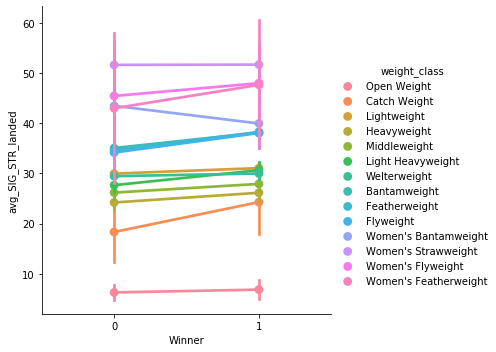

<Figure size 2160x936 with 0 Axes>

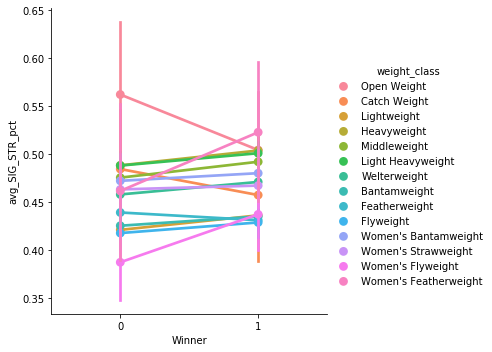

<Figure size 2160x936 with 0 Axes>

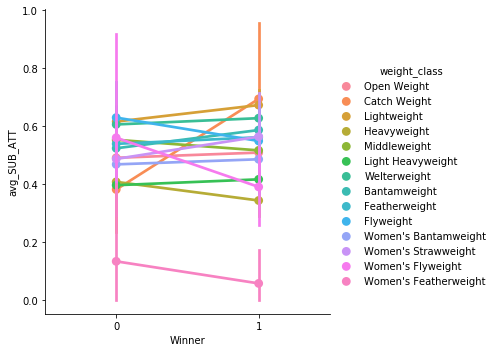

<Figure size 2160x936 with 0 Axes>

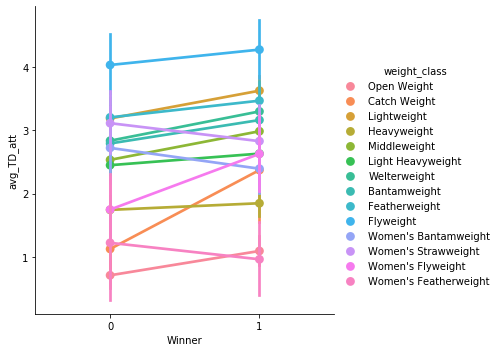

<Figure size 2160x936 with 0 Axes>

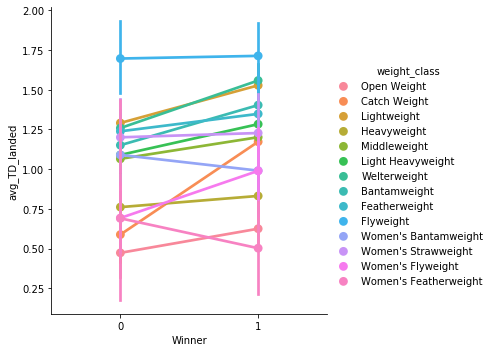

<Figure size 2160x936 with 0 Axes>

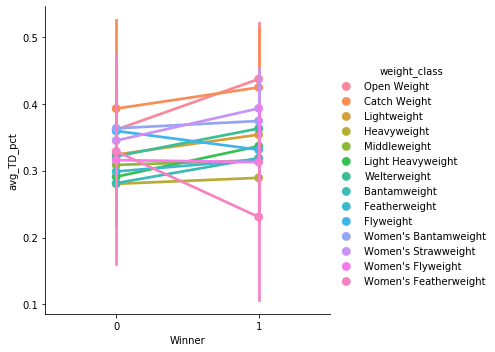

<Figure size 2160x936 with 0 Axes>

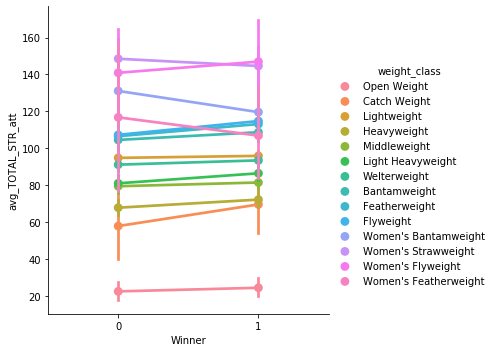

<Figure size 2160x936 with 0 Axes>

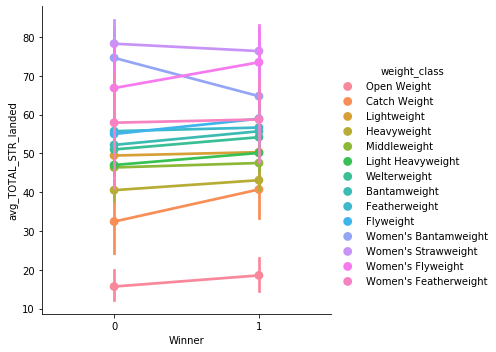

<Figure size 2160x936 with 0 Axes>

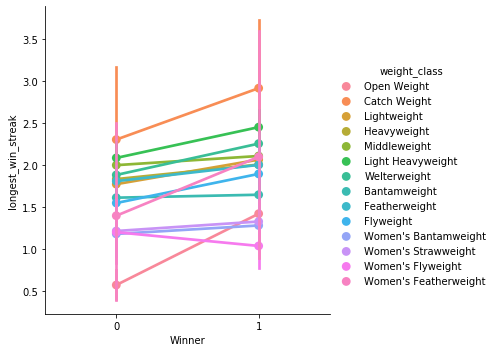

<Figure size 2160x936 with 0 Axes>

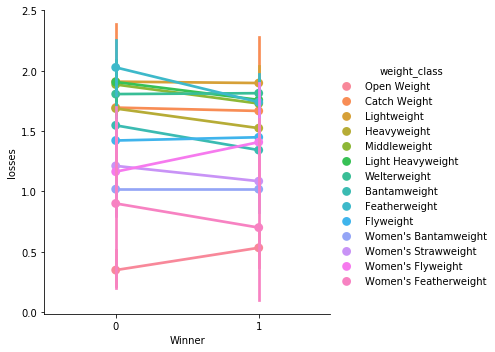

<Figure size 2160x936 with 0 Axes>

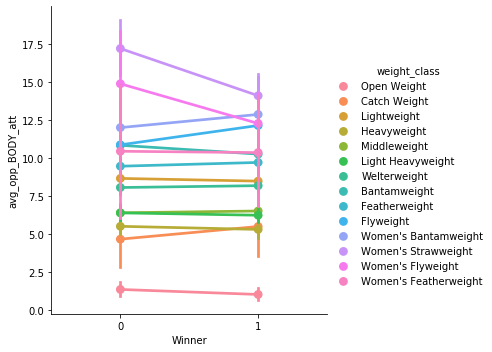

<Figure size 2160x936 with 0 Axes>

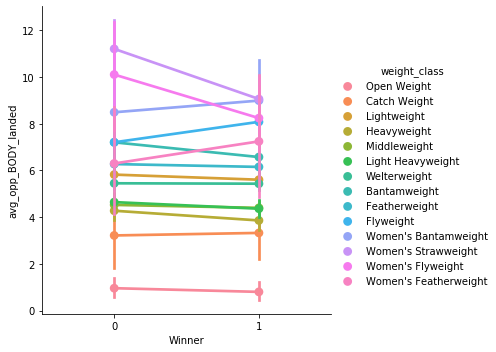

<Figure size 2160x936 with 0 Axes>

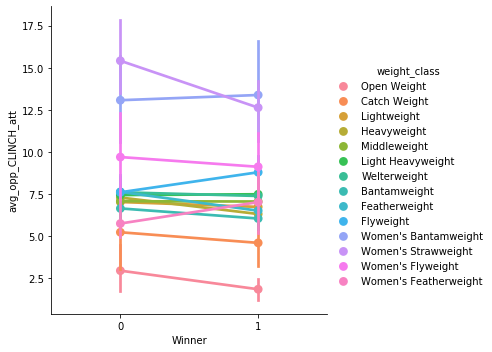

<Figure size 2160x936 with 0 Axes>

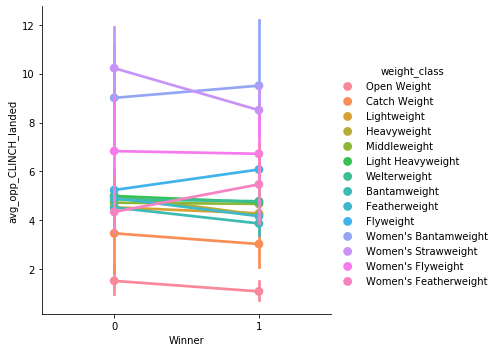

<Figure size 2160x936 with 0 Axes>

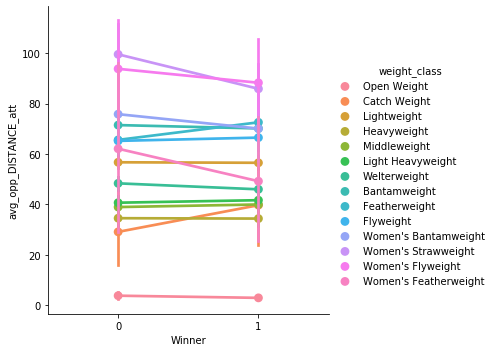

<Figure size 2160x936 with 0 Axes>

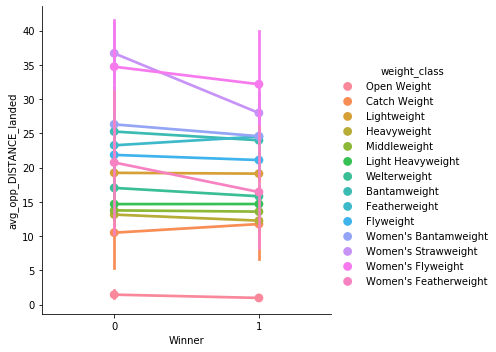

<Figure size 2160x936 with 0 Axes>

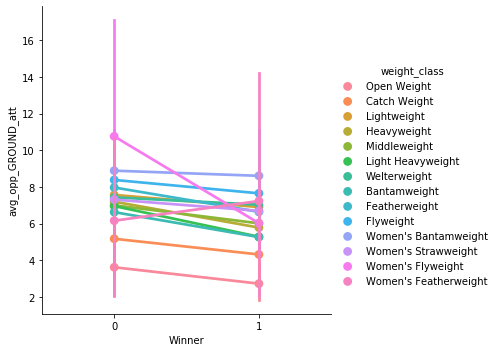

<Figure size 2160x936 with 0 Axes>

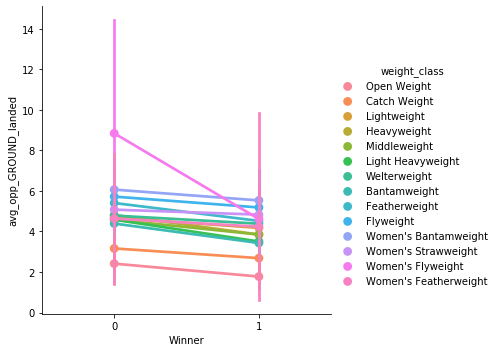

<Figure size 2160x936 with 0 Axes>

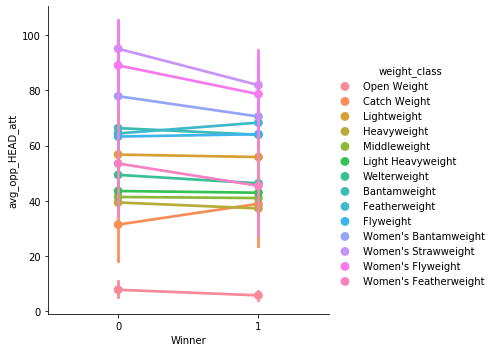

<Figure size 2160x936 with 0 Axes>

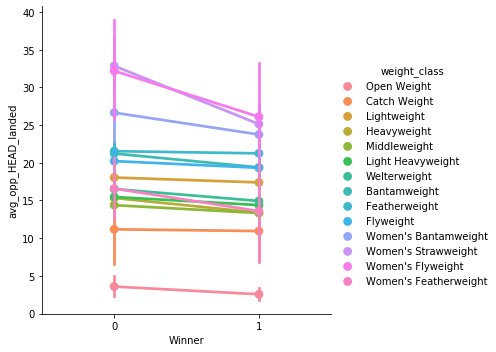

<Figure size 2160x936 with 0 Axes>

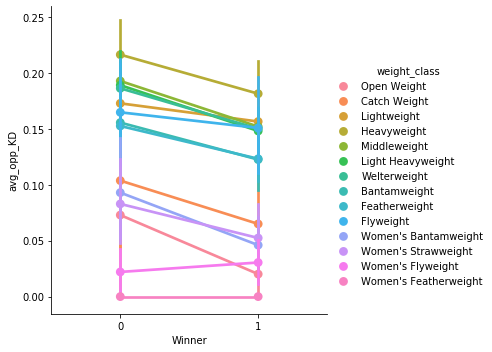

<Figure size 2160x936 with 0 Axes>

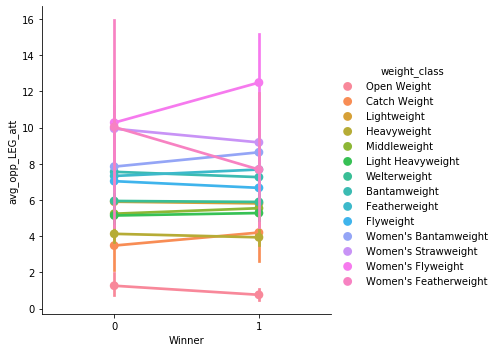

<Figure size 2160x936 with 0 Axes>

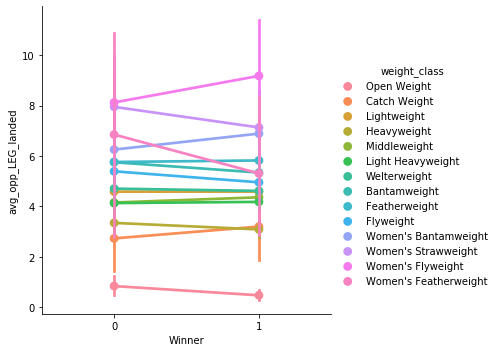

<Figure size 2160x936 with 0 Axes>

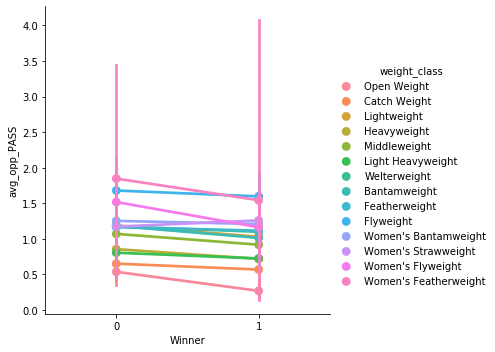

<Figure size 2160x936 with 0 Axes>

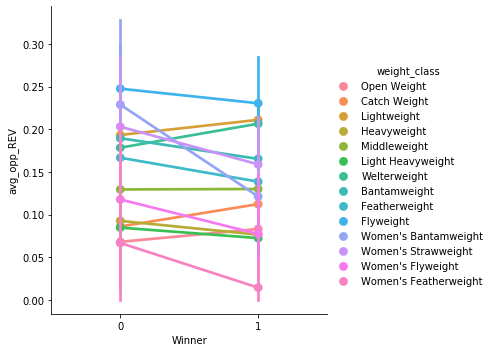

<Figure size 2160x936 with 0 Axes>

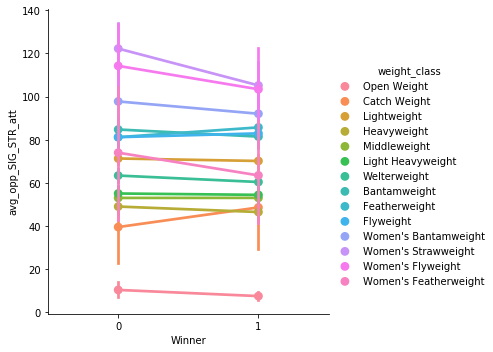

<Figure size 2160x936 with 0 Axes>

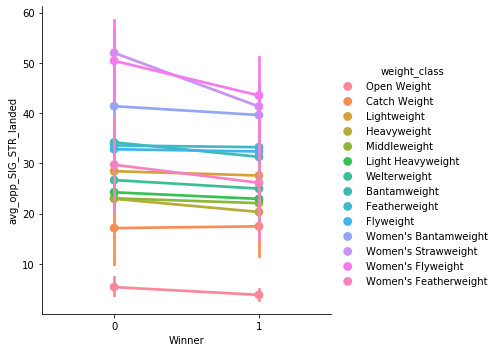

<Figure size 2160x936 with 0 Axes>

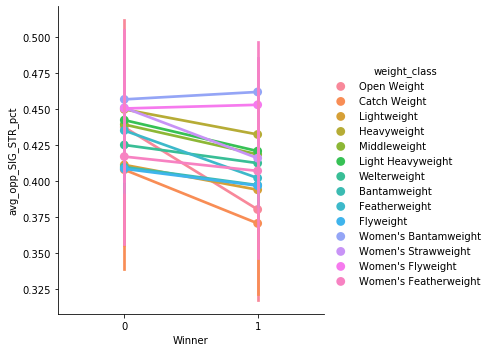

<Figure size 2160x936 with 0 Axes>

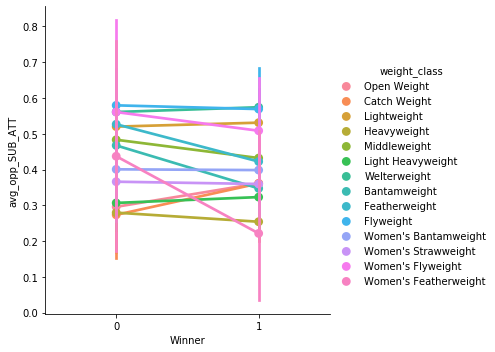

<Figure size 2160x936 with 0 Axes>

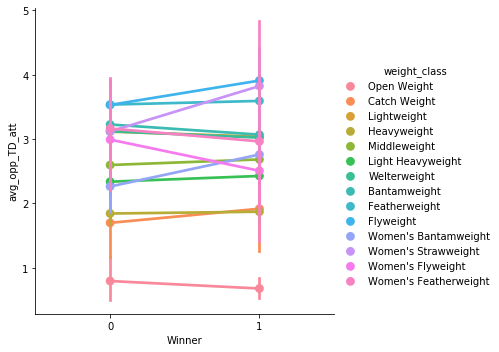

<Figure size 2160x936 with 0 Axes>

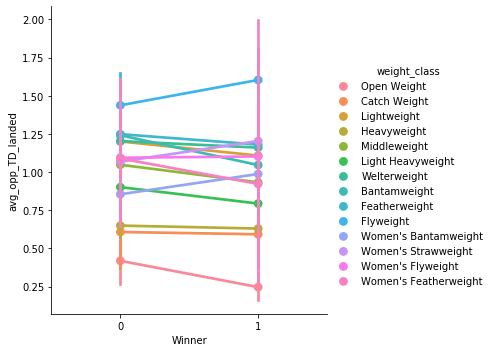

<Figure size 2160x936 with 0 Axes>

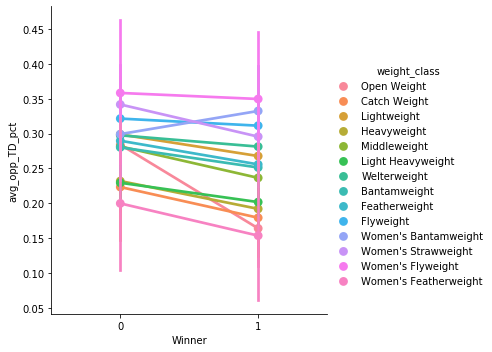

<Figure size 2160x936 with 0 Axes>

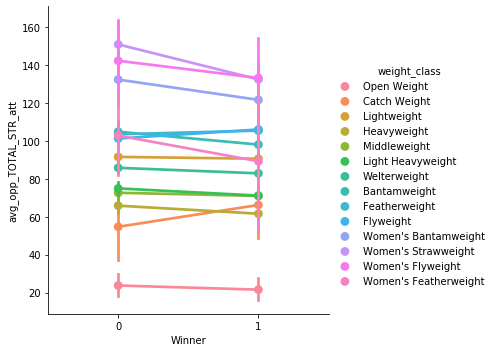

<Figure size 2160x936 with 0 Axes>

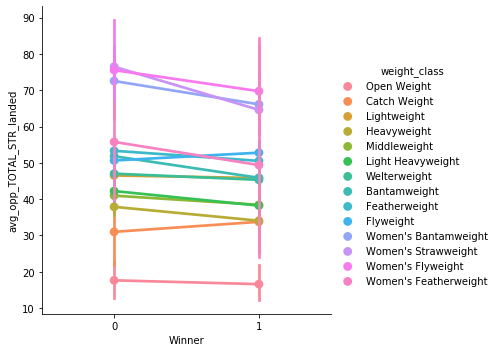

<Figure size 2160x936 with 0 Axes>

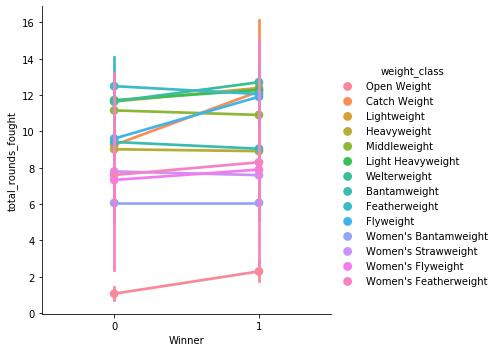

<Figure size 2160x936 with 0 Axes>

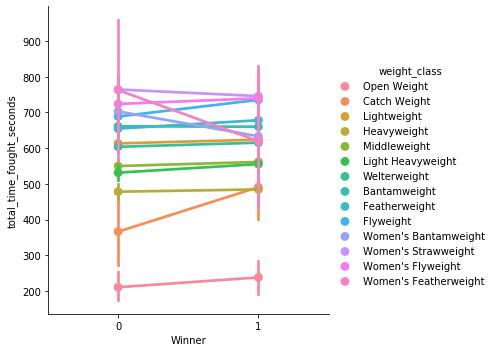

<Figure size 2160x936 with 0 Axes>

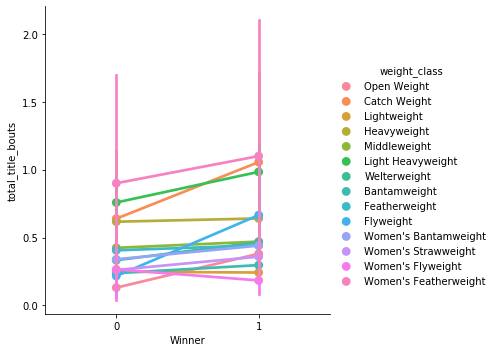

<Figure size 2160x936 with 0 Axes>

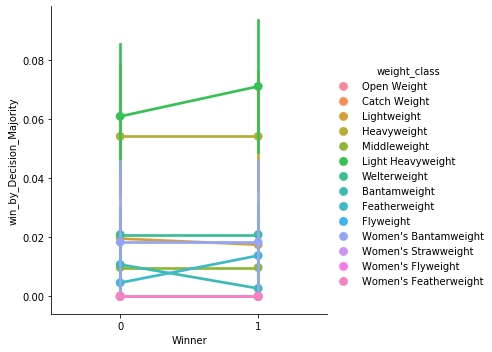

<Figure size 2160x936 with 0 Axes>

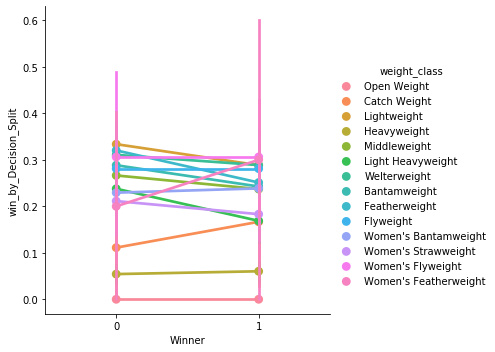

<Figure size 2160x936 with 0 Axes>

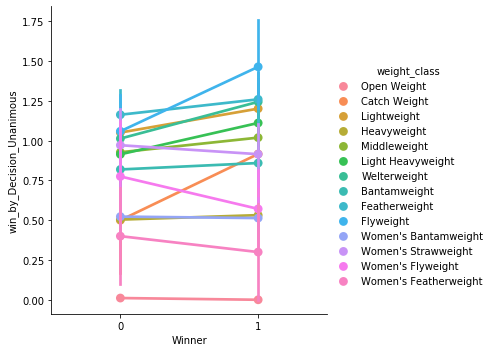

<Figure size 2160x936 with 0 Axes>

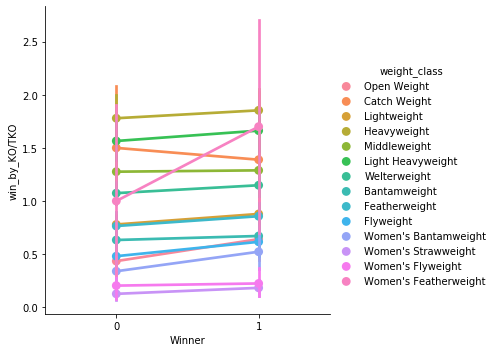

<Figure size 2160x936 with 0 Axes>

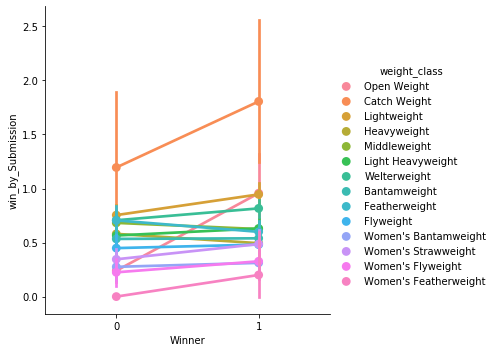

<Figure size 2160x936 with 0 Axes>

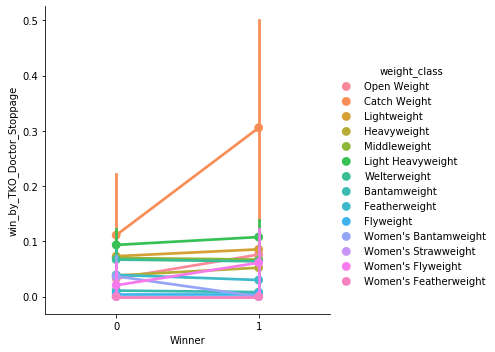

<Figure size 2160x936 with 0 Axes>

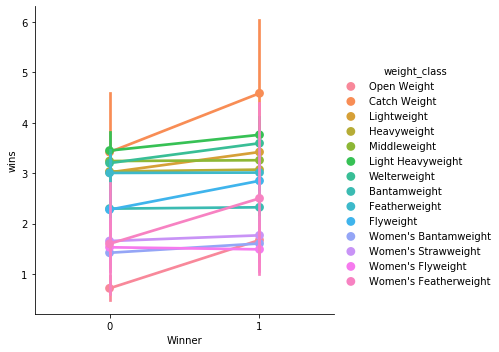

<Figure size 2160x936 with 0 Axes>

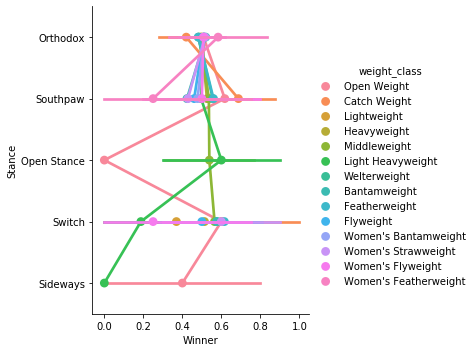

<Figure size 2160x936 with 0 Axes>

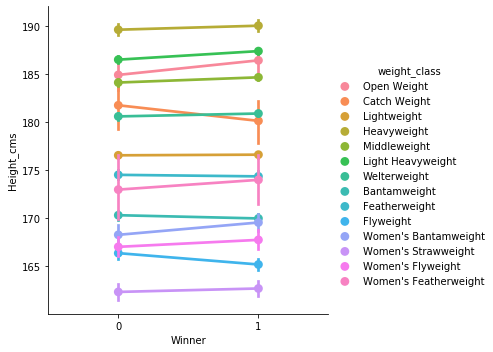

<Figure size 2160x936 with 0 Axes>

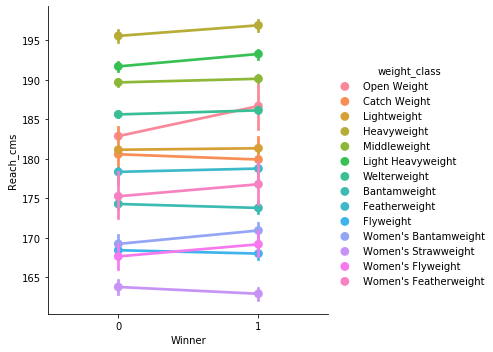

<Figure size 2160x936 with 0 Axes>

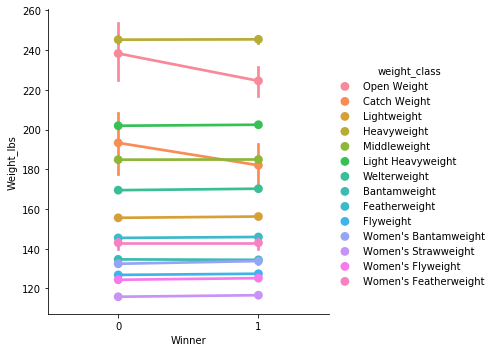

<Figure size 2160x936 with 0 Axes>

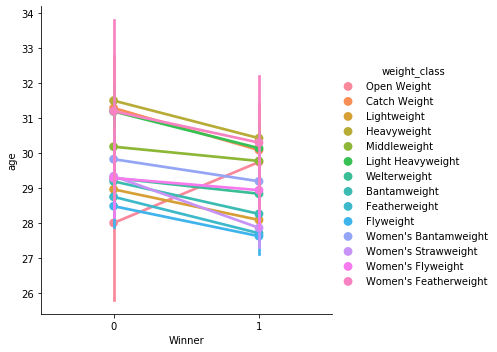

<Figure size 2160x936 with 0 Axes>

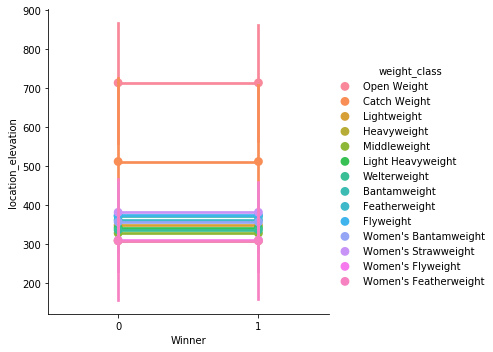

<Figure size 2160x936 with 0 Axes>

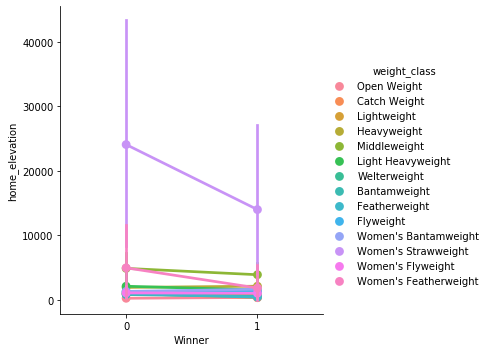

<Figure size 2160x936 with 0 Axes>

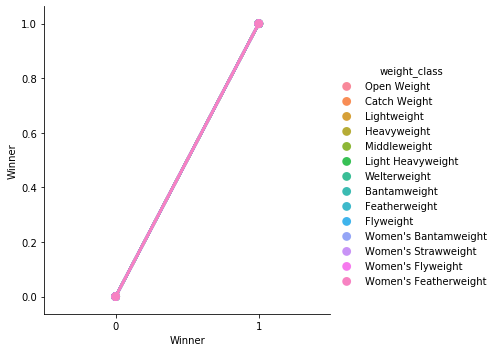

In [24]:
def inspect_data_wc(df, kind, columns):
    for column in columns:
        try:
            fig = plt.figure(figsize=(30, 13))
            sns.catplot(x='Winner', y=column, data=df, kind=kind, hue='weight_class');
            plt.show()
        except:
            pass

#Inspect data for age, height, reach categorical features with weight_class as hue
kinds = ['box', 'point']
columns = ['age', 'Height_cms', 'Reach_cms', 'current_win_streak', 'current_lose_strak', 'total_rounds_fought']
df = data.drop(columns=['fighter', 'city', 'country'])
for kind in kinds:
    inspect_data_wc(df, kind, df.columns)